# В этом ноутбуке представлены результаты второй серии экспериментов, в которой нужно было определять, является ли содержимое sms или электронного письма спамом. В рамках второй серии экспериментов рассматривались датасет с sms и датасет с emails.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

np.random.seed(191)

%config InlineBackend.figure_format = 'retina'

# sns.set(style='whitegrid', palette='deep')
# sns.set(style='darkgrid', palette='rocket')
sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 14, 9
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

In [ ]:
model_names = ['ALBERT', 'BERT', 'DistilBERT', 'ELECTRA', 'LaBSE',
               'LAMBERT', 'MobileBERT', 'ROBERTA', 'talkheads_ggelu_bert', 'tn_bert']
dataset_names = ['sms', 'emails']
model_names_lower_case_list = ['albert', 'bert', 'distilbert', 'electra', 'labse', 'lambert', 'mobilebert', 'roberta', 'talkheads_ggelu_bert', 'tn_bert']

# Часть 1. Создадим dataframe с результатами моделей на **тестовой выборке** и визуализируем результаты

In [ ]:
df_with_test_results = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1_score'])

In [ ]:
csv_name = 'on spam testing result.csv'

In [ ]:
for model_name in model_names_lower_case_list:
    cur_df = pd.read_csv('/content/drive/MyDrive/data_for_colab/dataframes/test_quality/' + model_name + ' ' + csv_name)
    df_with_test_results = pd.concat([df_with_test_results, cur_df], axis=0)


In [ ]:
df_with_test_results.set_index('Unnamed: 0', inplace=True) 
df_with_test_results.index.name = None 

In [ ]:
df_with_test_results

,accuracy,precision,recall,f1_score
albert trained on spam sms tested on spam sms dataset,0.975583,0.957958,0.855228,0.903683
albert trained on spam sms tested on spam emails dataset,0.462282,0.324384,0.790387,0.459984
albert trained on spam emails tested on spam sms dataset,0.421185,0.142939,0.664879,0.235294
albert trained on spam emails tested on spam emails dataset,0.869246,0.866310,0.648865,0.741985
bert trained on spam sms tested on spam sms dataset,0.950090,0.968000,0.648794,0.776886
bert trained on spam sms tested on spam emails dataset,0.417408,0.219422,0.395194,0.282173
bert trained on spam emails tested on spam sms dataset,0.234829,0.121773,0.758713,0.209863
bert trained on spam emails tested on spam emails dataset,0.895938,0.864742,0.759680,0.808813
distilbert trained on spam sms tested on spam sms dataset,0.989228,0.980392,0.938338,0.958904
distilbert trained on spam sms tested on spam emails dataset,0.675822,0.451260,0.550067,0.495788


Визуализируем 1: качество на тестовой выборке в зависимости от модели

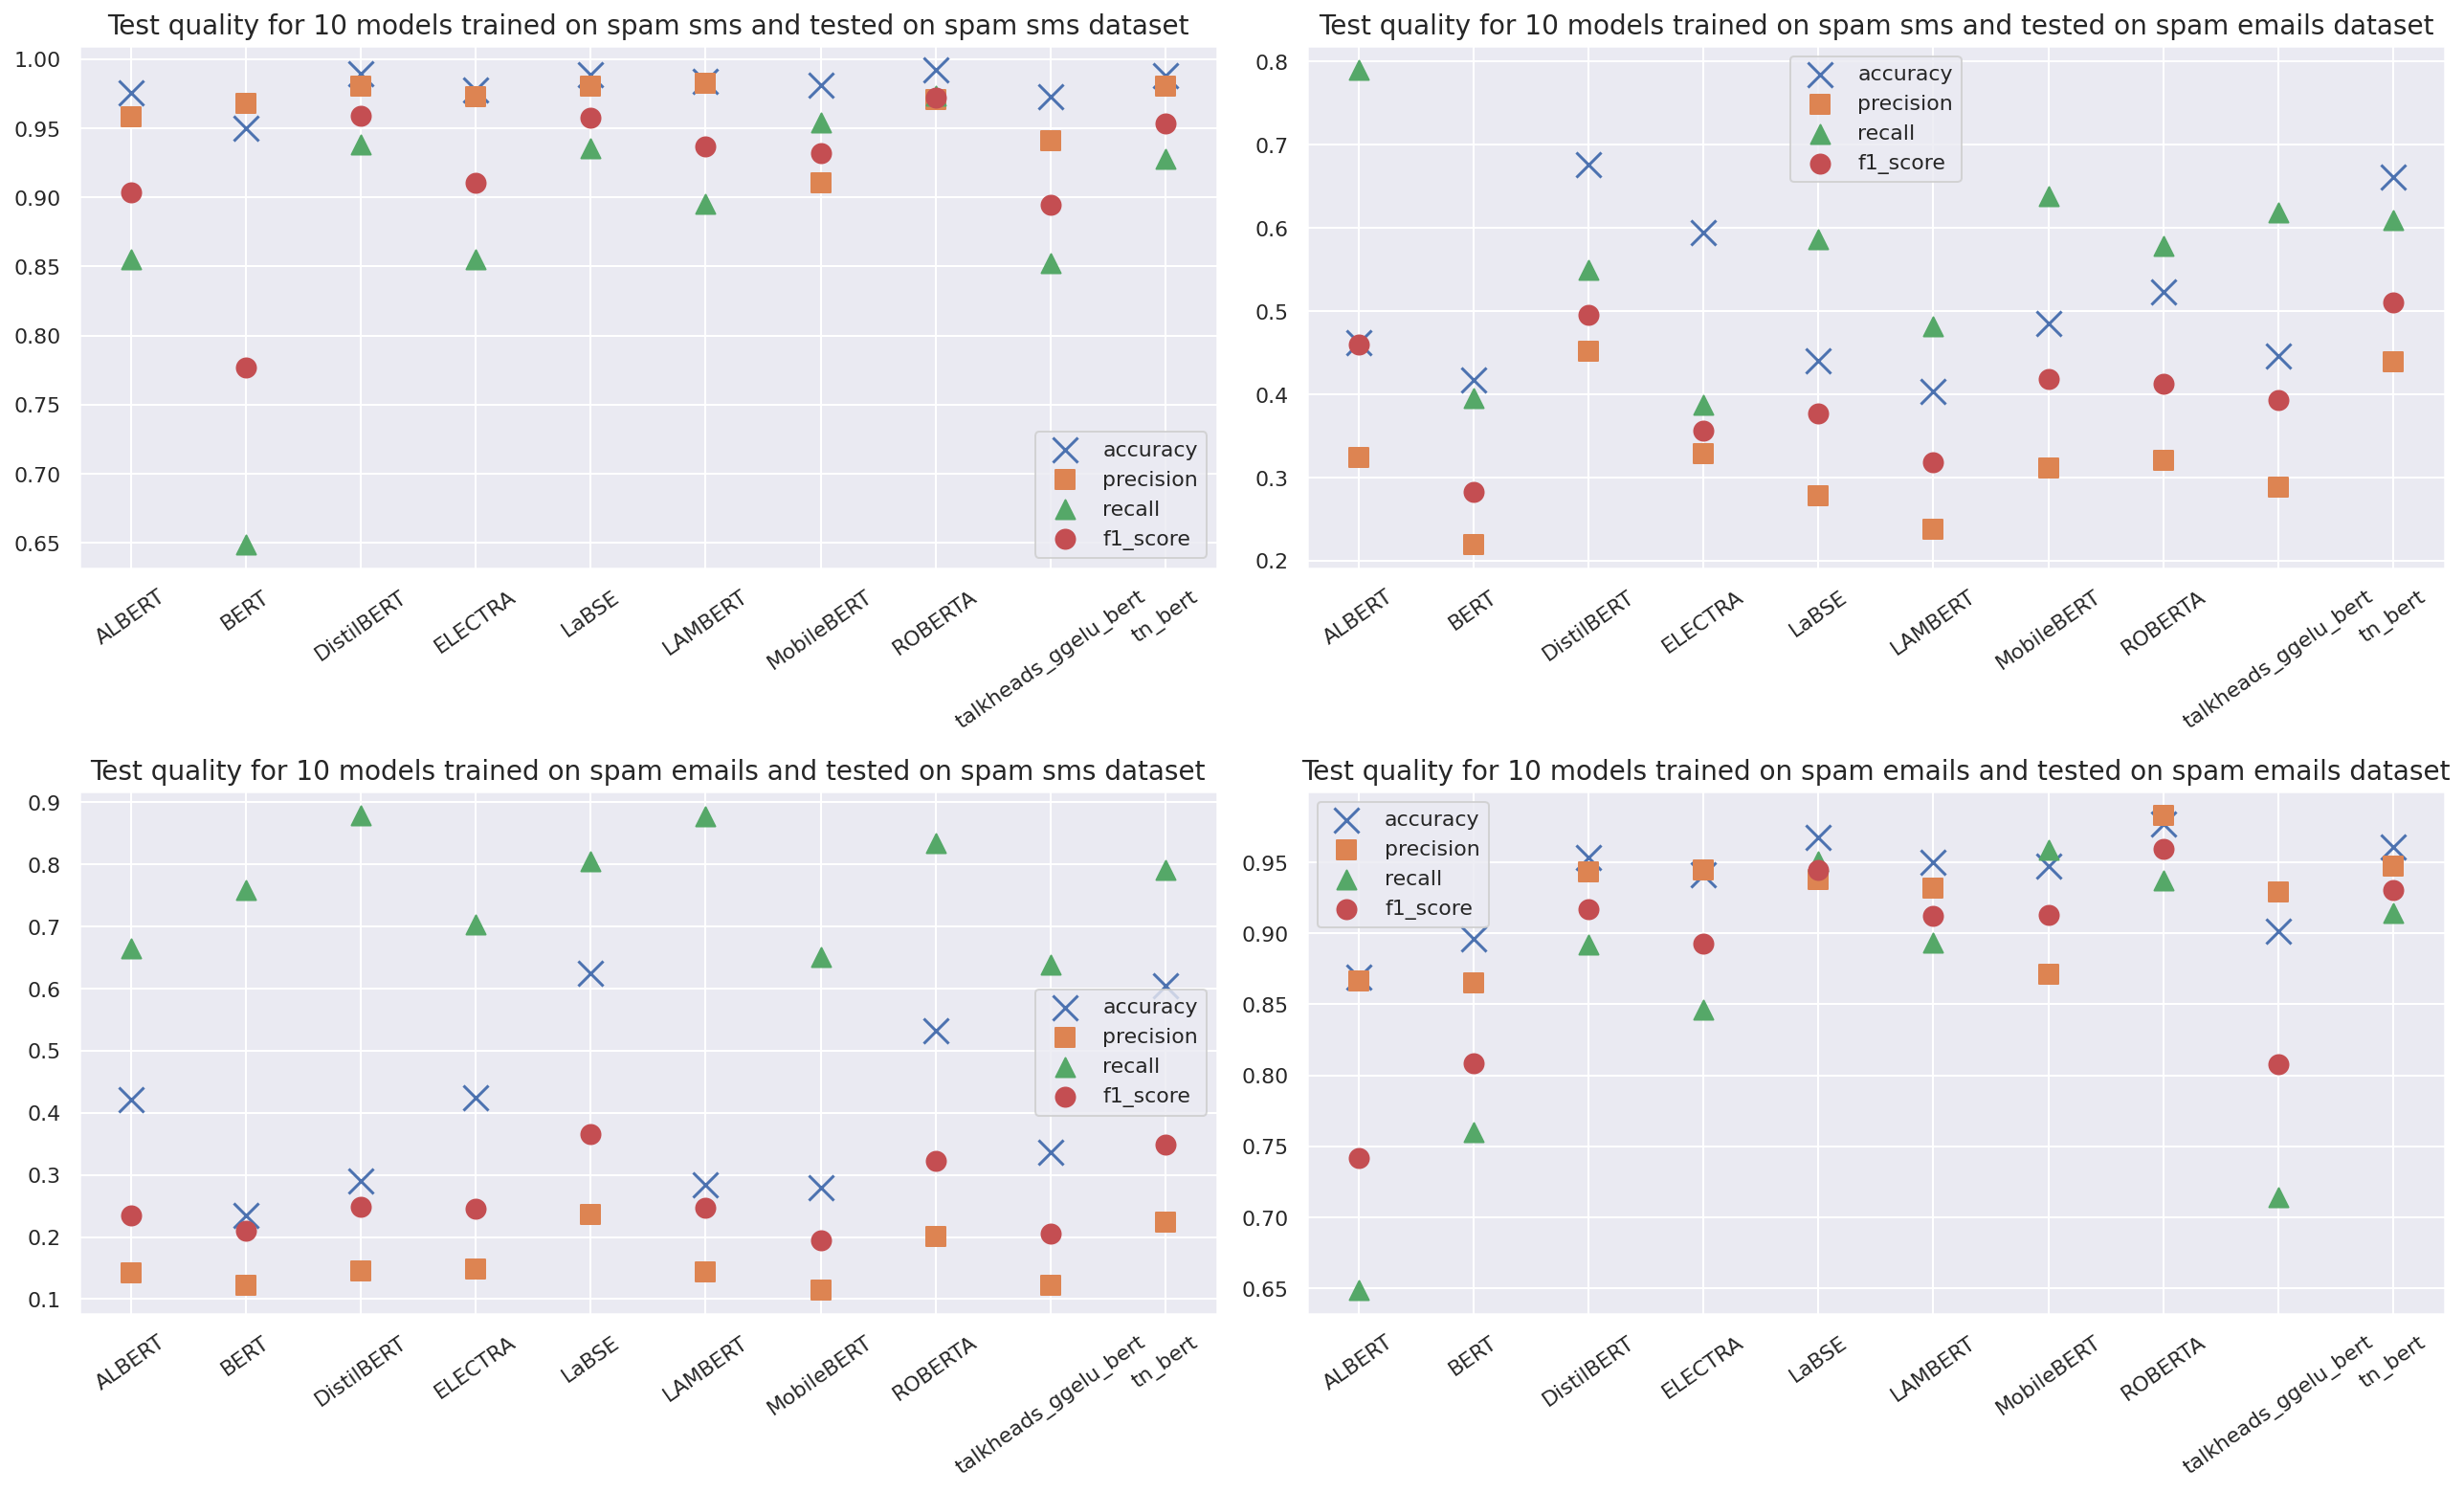

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 11))
for i in range(2):
    for j in range(2):
        df_cur = df_with_test_results[df_with_test_results.index.str.contains('trained on spam ' + dataset_names[i] +
                                                                          ' tested on spam ' + dataset_names[j] + ' dataset') == True]
        axes[i, j].scatter(x=model_names, y=df_cur.accuracy, label='accuracy', marker='x', s=170)
        axes[i, j].scatter(x=model_names, y=df_cur.precision, label='precision', marker='s', s=100)
        axes[i, j].scatter(x=model_names, y=df_cur.recall, label='recall', marker='^', s=100)
        axes[i, j].scatter(x=model_names, y=df_cur.f1_score, label='f1_score', s=100)
        axes[i, j].set_title("Test quality for 10 models "
         + 'trained on spam ' + dataset_names[i] +' and tested on spam ' 
         + dataset_names[j] + ' dataset', fontsize=14)
        axes[i, j].tick_params(axis='x', labelrotation = 35)
        axes[i, j].legend()
fig.tight_layout()
plt.show()

Визуализируем 2: качество на тестовой выборке для всех 10 моделей сразу, а также среднее и медианное значения для accuracy, precision, recall, f1_score.

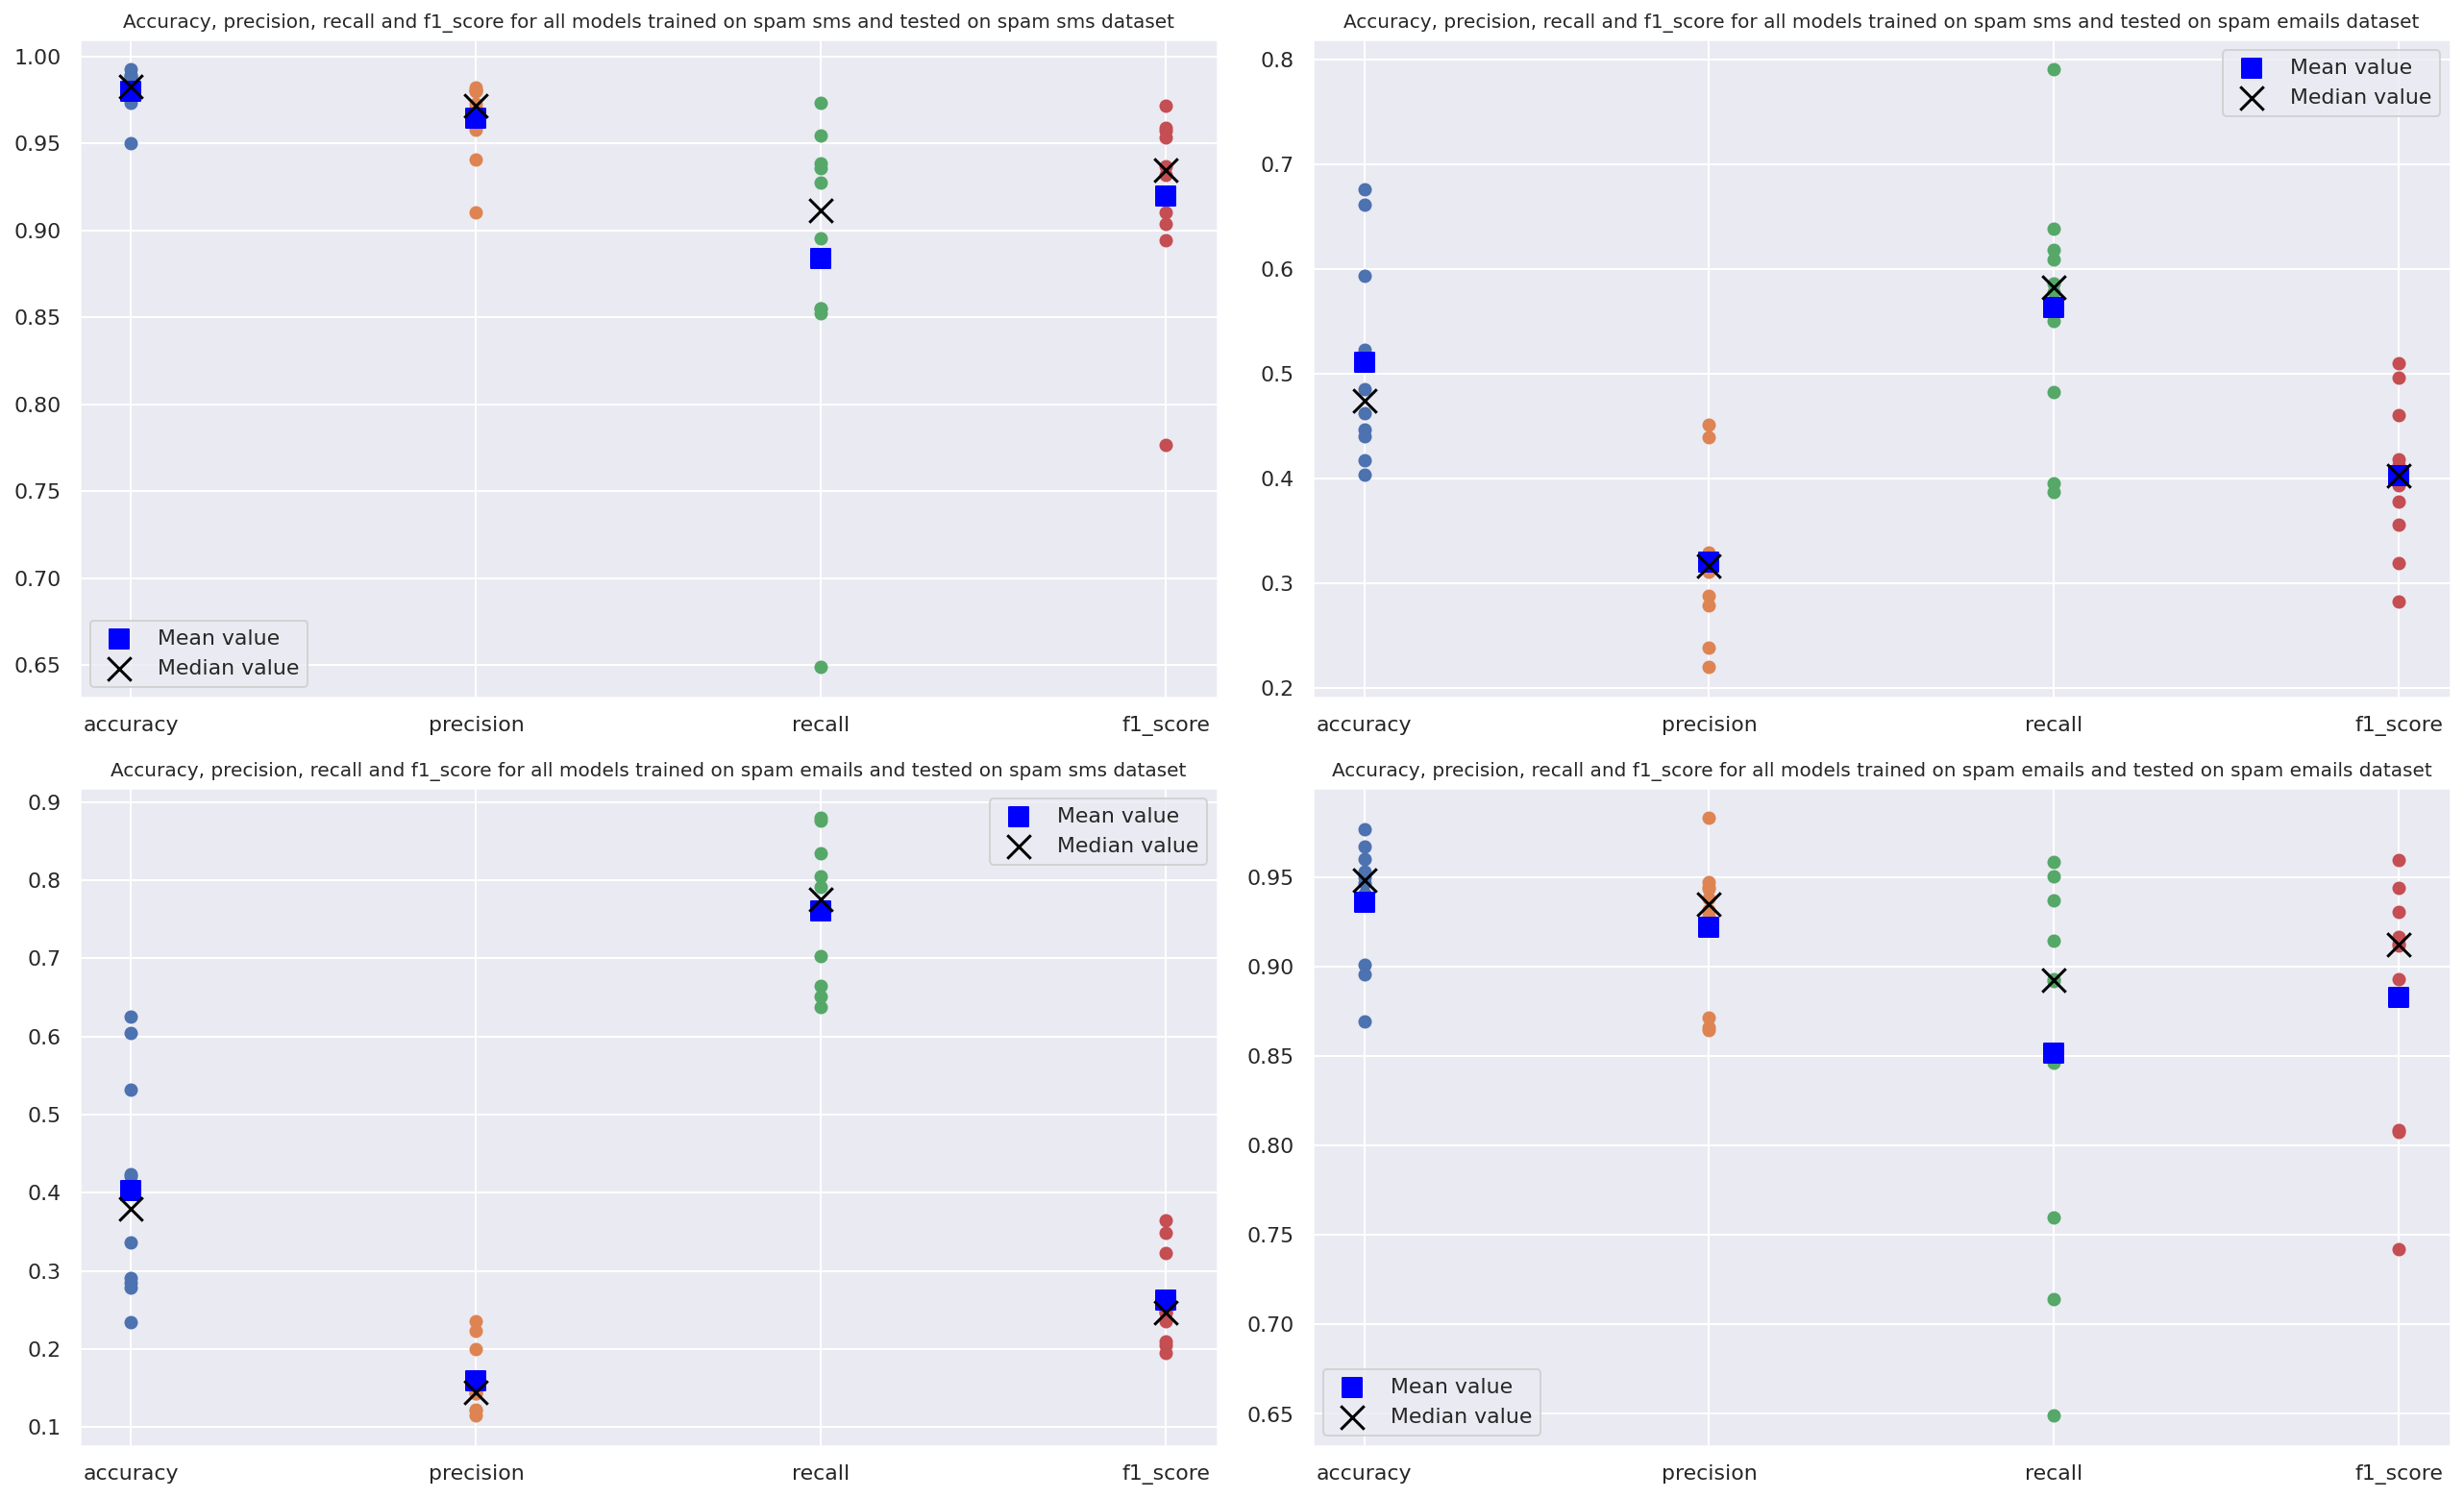

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 11))
for i in range(2):
    for j in range(2):
        df_cur = df_with_test_results[df_with_test_results.index.str.contains('trained on spam ' + dataset_names[i] +
                                                                          ' tested on spam ' + dataset_names[j] + ' dataset') == True]
        axes[i, j].scatter(x=['accuracy'] * len(df_cur.accuracy), y=df_cur.accuracy)
        axes[i, j].scatter(x=['precision'] * len(df_cur.precision), y=df_cur.precision)
        axes[i, j].scatter(x=['recall'] * len(df_cur.recall), y=df_cur.recall)
        axes[i, j].scatter(x=['f1_score'] * len(df_cur.f1_score), y=df_cur.f1_score)
        axes[i, j].scatter(x=['accuracy', 'precision', 'recall', 'f1_score'], 
                           y=[df_cur.accuracy.mean(), df_cur.precision.mean(), df_cur.recall.mean(), df_cur.f1_score.mean()],
                           color='blue', marker='s', s=100, label='Mean value')
        axes[i, j].scatter(x=['accuracy', 'precision', 'recall', 'f1_score'], 
                    y=[df_cur.accuracy.median(), df_cur.precision.median(), df_cur.recall.median(), df_cur.f1_score.median()],
                    color='black', marker='x', s=150, label='Median value')
        axes[i, j].set_title("Accuracy, precision, recall and f1_score for all models " 
                             +'trained on spam ' + dataset_names[i] +' and tested on spam '
                              + dataset_names[j] + ' dataset', fontsize=10)
        axes[i, j].legend()
fig.tight_layout()
plt.show()


# Часть 2. Теперь создадим dataframe с качеством на **обучающей выборке**, для него визуализировать результаты не будем, потому что эти результаты нужны лишь для визуализации в части 3

In [ ]:
df_with_train_results = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1_score'])

In [ ]:
csv_name_first_part = 'trained on spam'
csv_name_second_part = 'quality on train dataset.csv'

In [ ]:
for model_name in model_names_lower_case_list:
    for dataset_name in dataset_names:
        cur_df = pd.read_csv('/content/drive/MyDrive/data_for_colab/dataframes/train_quality/' +
                             model_name + ' ' + csv_name_first_part + ' ' + dataset_name + ' ' + csv_name_second_part)
        df_with_train_results = pd.concat([df_with_train_results, cur_df], axis=0)


In [ ]:
df_with_train_results.set_index('Unnamed: 0', inplace=True) 
df_with_train_results.index.name = None 

In [ ]:
df_with_train_results

,accuracy,precision,recall,f1_score
albert trained on spam sms quality on train dataset,0.977020,0.937677,0.887399,0.911846
albert trained on spam emails quality on train dataset,0.877756,0.844197,0.708945,0.770682
bert trained on spam sms quality on train dataset,0.965530,0.915916,0.817694,0.864023
bert trained on spam emails quality on train dataset,0.904836,0.877061,0.781041,0.826271
distilbert trained on spam sms quality on train dataset,0.989228,0.975069,0.943700,0.959128
distilbert trained on spam emails quality on train dataset,0.966344,0.942513,0.941255,0.941884
electra trained on spam sms quality on train dataset,0.982765,0.965616,0.903485,0.933518
electra trained on spam emails quality on train dataset,0.955899,0.937931,0.907877,0.922659
labse trained on spam sms quality on train dataset,0.995332,0.991803,0.973190,0.982409
labse trained on spam emails quality on train dataset,0.977950,0.965054,0.958611,0.961822


# Часть 3. Теперь создадим dataframe с разницей качества на тестовой выборке и обучающей выборке


In [ ]:
df_with_quality_difference = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1_score'])

In [ ]:
for index, row in df_with_test_results.iterrows():
    # будем считать test_quality - train_quality
    if row['accuracy'] == ' ':
        # рассматриваемая строка представляет собой название модели
        df_with_quality_difference.loc[index] = ' '
    else:
        # рассматриваемая строка представляет собой результаты тестирования

        # parse index
        index_words = [word for word in index.split()]
        beginning_of_index = index_words[0]
        for i in range(1, 5):
            beginning_of_index += ' ' + index_words[i]
        # fill the new dataframe
        for column_name in ['accuracy', 'precision', 'recall', 'f1_score']:
            test_quality = row[column_name]
            train_quality = df_with_train_results.loc[beginning_of_index + ' quality on train dataset', column_name]
            df_with_quality_difference.loc[index + ' quality difference' , column_name] = test_quality - train_quality

In [ ]:
df_with_quality_difference

,accuracy,precision,recall,f1_score
albert trained on spam sms tested on spam sms dataset quality difference,-0.001436,0.020281,-0.032172,-0.008163
albert trained on spam sms tested on spam emails dataset quality difference,-0.514737,-0.613293,-0.097012,-0.451861
albert trained on spam emails tested on spam sms dataset quality difference,-0.456571,-0.701258,-0.044066,-0.535388
albert trained on spam emails tested on spam emails dataset quality difference,-0.008511,0.022113,-0.06008,-0.028697
bert trained on spam sms tested on spam sms dataset quality difference,-0.01544,0.052084,-0.168901,-0.087137
bert trained on spam sms tested on spam emails dataset quality difference,-0.548121,-0.696494,-0.422501,-0.581849
bert trained on spam emails tested on spam sms dataset quality difference,-0.670006,-0.755289,-0.022328,-0.616408
bert trained on spam emails tested on spam emails dataset quality difference,-0.008897,-0.01232,-0.021362,-0.017458
distilbert trained on spam sms tested on spam sms dataset quality difference,-0.0,0.005323,-0.005362,-0.000224
distilbert trained on spam sms tested on spam emails dataset quality difference,-0.313406,-0.52381,-0.393633,-0.46334


In [ ]:
cur_name_for_dataframe = 'df_with_absolute_quality_difference'
df_with_quality_difference.to_csv('/content/drive/MyDrive/data_for_colab/dataframes/second_series_of_experiments/' + cur_name_for_dataframe + '.csv')

Посмотрим, как изменяются accuracy и f1_score при переходе с тестовой выборки на обучающую.

Визуализируем 3: график разностей качества (accuracy, f1_score) на тестовой и обучающей выборке для 10 моделей

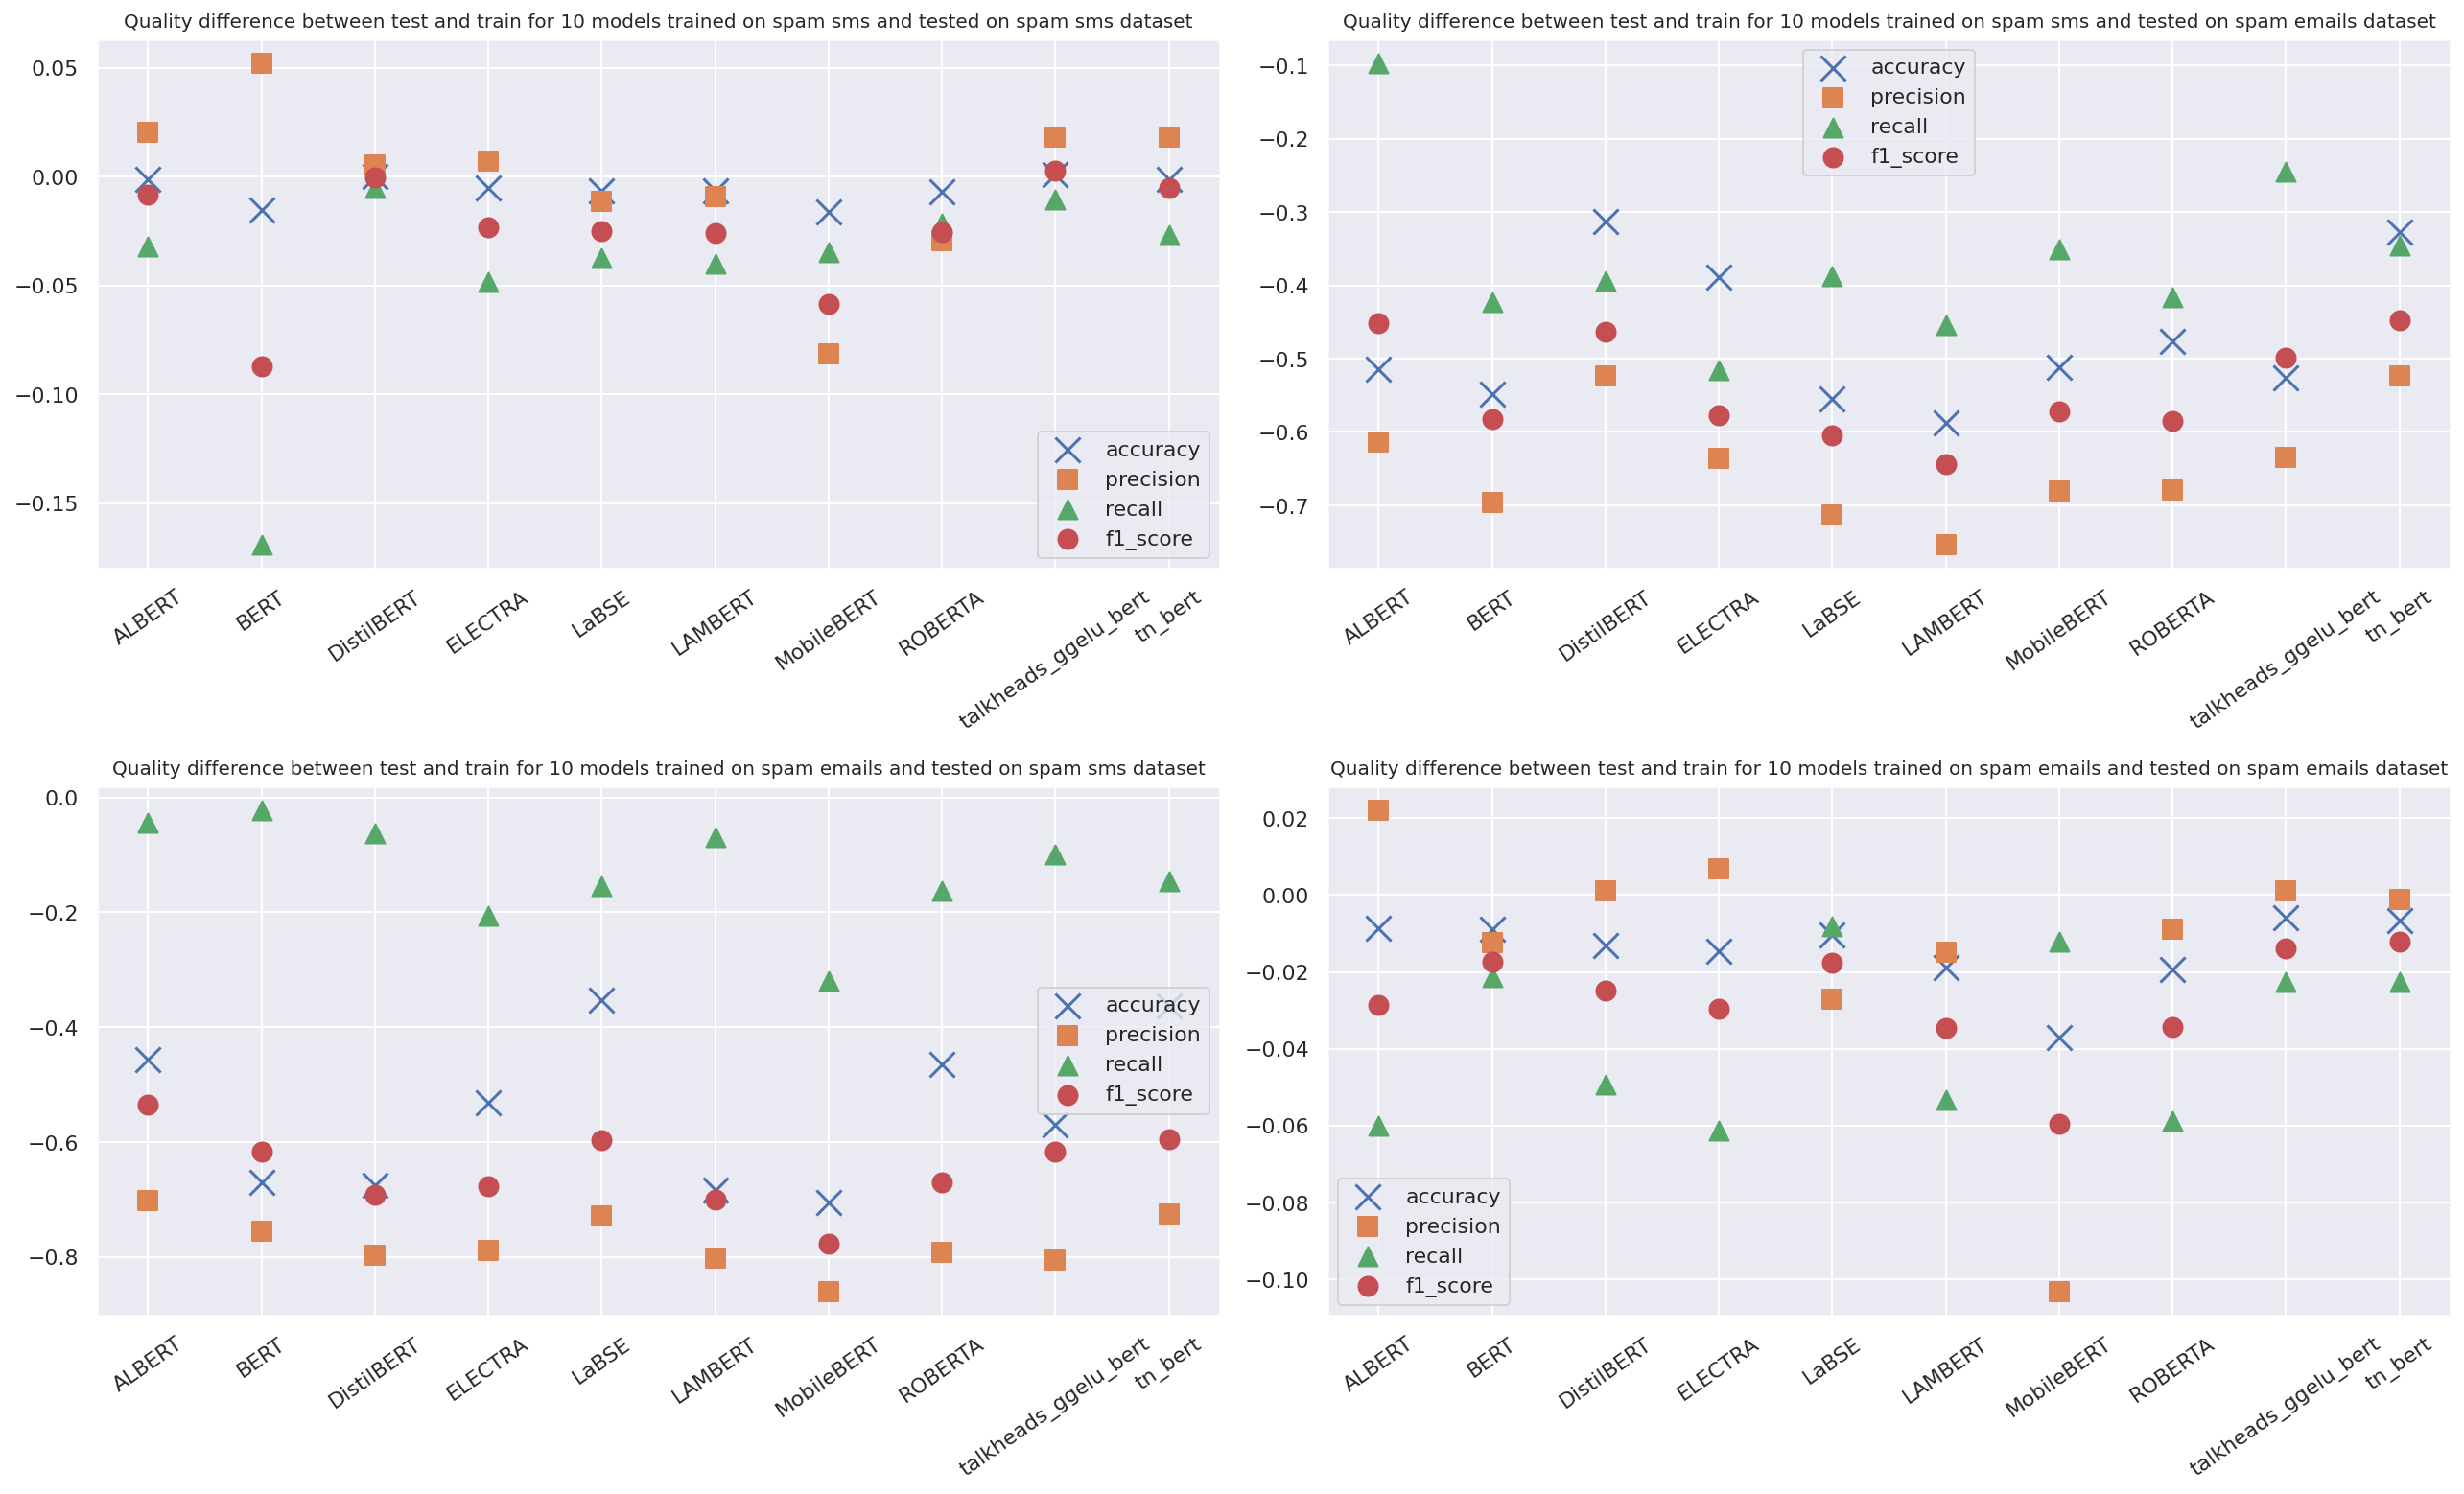

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 11))
for i in range(2):
    for j in range(2):
        df_cur = df_with_quality_difference[df_with_quality_difference.index.str.contains('trained on spam ' + dataset_names[i] +
                                                                                  ' tested on spam ' + dataset_names[j] + ' dataset') == True]
        axes[i, j].scatter(x=model_names, y=df_cur.accuracy, label='accuracy', marker='x', s=170)
        axes[i, j].scatter(x=model_names, y=df_cur.precision, label='precision', marker='s', s=100)
        axes[i, j].scatter(x=model_names, y=df_cur.recall, label='recall', marker='^', s=100)
        axes[i, j].scatter(x=model_names, y=df_cur.f1_score, label='f1_score', s=100)
        axes[i, j].set_title("Quality difference between test and train for 10 models "
         + 'trained on spam ' + dataset_names[i] +' and tested on spam ' 
         + dataset_names[j] + ' dataset', fontsize=10)
        axes[i, j].tick_params(axis='x', labelrotation = 35)
        axes[i, j].legend()
fig.tight_layout()
plt.show()

Визуализируем 4: разности качества на тестовой и обучающей выборках для всех 10 моделей сразу, а также среднее и медианное значения для разностей accuracy, precision, recall, f1_score.

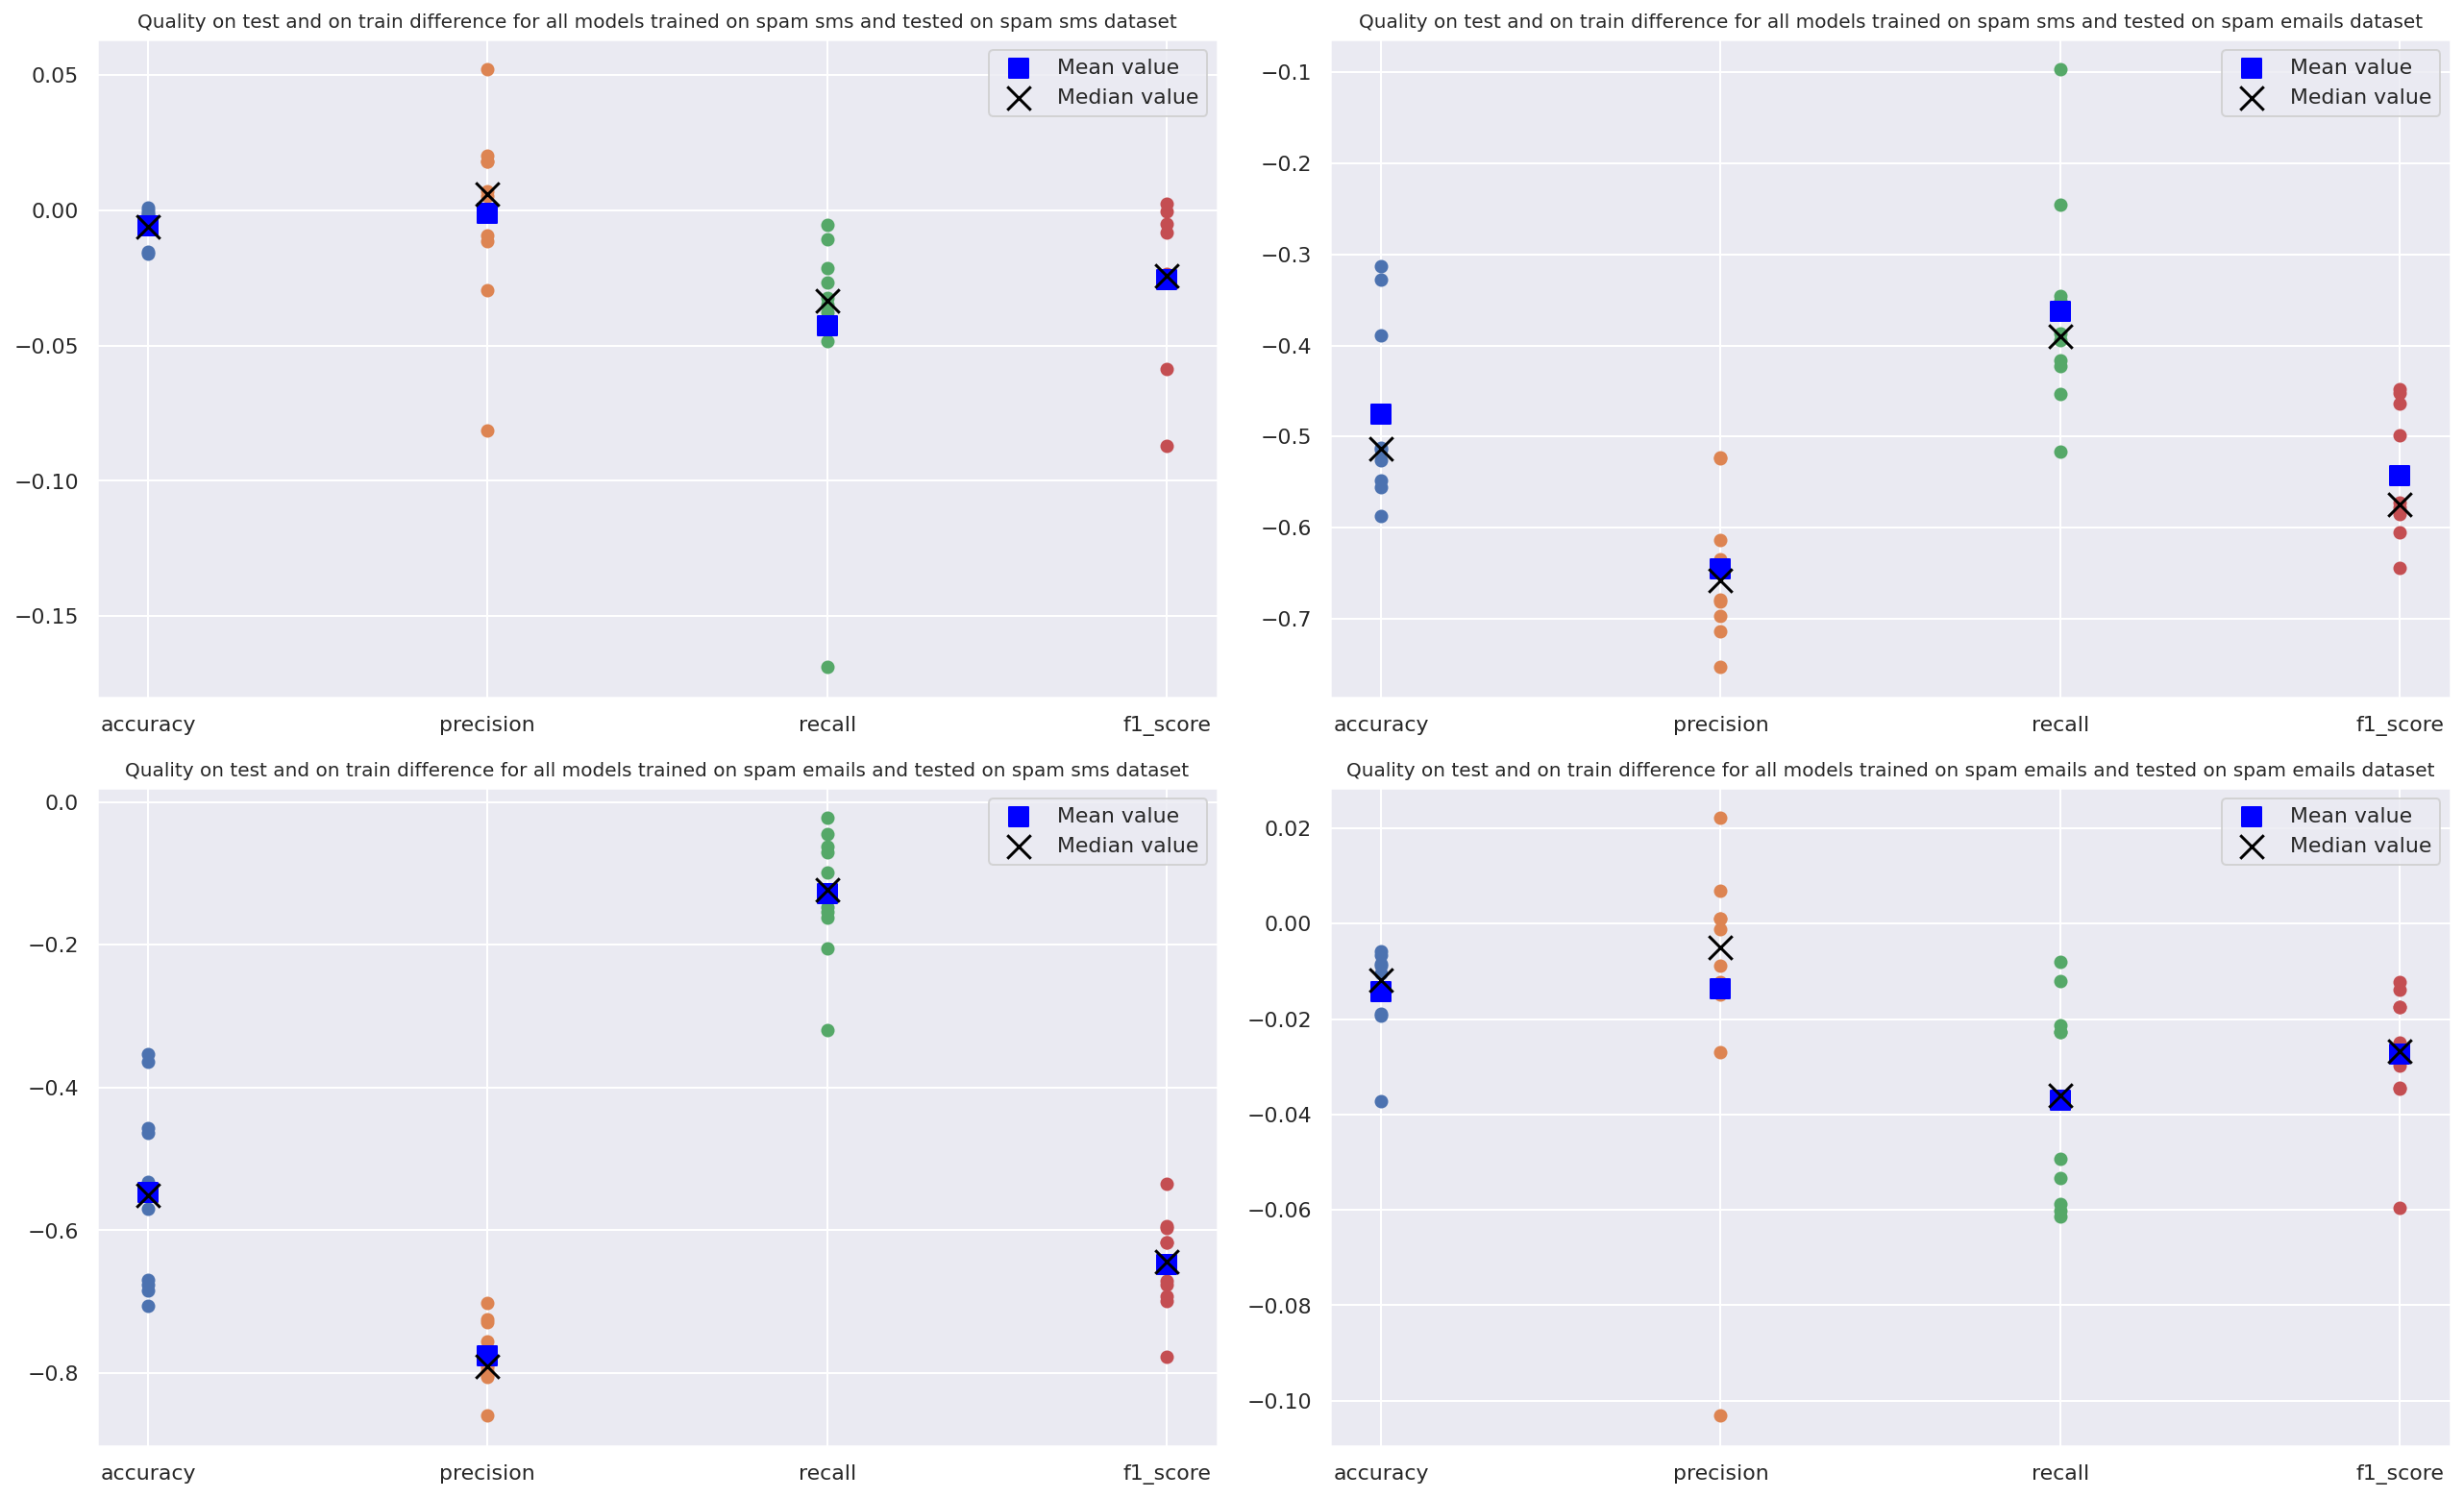

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 11))
for i in range(2):
    for j in range(2):
        df_cur = df_with_quality_difference[df_with_quality_difference.index.str.contains('trained on spam ' + dataset_names[i] +
                                                                                  ' tested on spam ' + dataset_names[j] + ' dataset') == True]
        axes[i, j].scatter(x=['accuracy'] * len(df_cur.accuracy), y=df_cur.accuracy)
        axes[i, j].scatter(x=['precision'] * len(df_cur.precision), y=df_cur.precision)
        axes[i, j].scatter(x=['recall'] * len(df_cur.recall), y=df_cur.recall)
        axes[i, j].scatter(x=['f1_score'] * len(df_cur.f1_score), y=df_cur.f1_score)
        axes[i, j].scatter(x=['accuracy', 
                              'precision', 'recall', 
                            'f1_score'], 
                           y=[df_cur.accuracy.mean(), 
                              df_cur.precision.mean(), df_cur.recall.mean(), 
                            df_cur.f1_score.mean()],
                           color='blue', marker='s', s=100, label='Mean value')
        axes[i, j].scatter(x=['accuracy', 
                              'precision', 'recall', 
                            'f1_score'], 
                    y=[df_cur.accuracy.median(), 
                       df_cur.precision.median(), df_cur.recall.median(), 
                    df_cur.f1_score.median()],
                    color='black', marker='x', s=150, label='Median value')
        axes[i, j].set_title("Quality on test and on train difference for all models " 
                             +'trained on spam ' + dataset_names[i] +' and tested on spam '
                              + dataset_names[j] + ' dataset', fontsize=10)
        axes[i, j].legend()
fig.tight_layout()
plt.show()

# Часть 4. Создадим dataframe с относительным изменением качества (accuracy, f1_score) при переходе с обучающей выборки на тестовую. Визуализируем результаты

In [ ]:
df_with_quality_difference_in_percent = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1_score'])

In [ ]:
for index, row in df_with_test_results.iterrows():
    # будем считать test_quality - train_quality
    if row['accuracy'] == ' ':
        # рассматриваемая строка представляет собой название модели
        df_with_quality_difference_in_percent.loc[index] = ' '
    else:
        # рассматриваемая строка представляет собой результаты тестирования

        # parse index
        index_words = [word for word in index.split()]
        beginning_of_index = index_words[0]
        for i in range(1, 5):
            beginning_of_index += ' ' + index_words[i]
        # fill the new dataframe
        for column_name in ['accuracy', 'precision', 'recall', 'f1_score']:
            test_quality = row[column_name]
            train_quality = df_with_train_results.loc[beginning_of_index + ' quality on train dataset', column_name]
            df_with_quality_difference_in_percent.loc[index + ' difference in percent' , column_name] = (test_quality - train_quality) / train_quality * 100

In [ ]:
df_with_quality_difference_in_percent

,accuracy,precision,recall,f1_score
albert trained on spam sms tested on spam sms dataset difference in percent,-0.147003,2.162891,-3.625375,-0.895215
albert trained on spam sms tested on spam emails dataset difference in percent,-52.684436,-65.405619,-10.932197,-49.554573
albert trained on spam emails tested on spam sms dataset difference in percent,-52.015734,-83.067998,-6.215701,-69.46937
albert trained on spam emails tested on spam emails dataset difference in percent,-0.969591,2.619413,-8.474578,-3.72364
bert trained on spam sms tested on spam sms dataset difference in percent,-1.599107,5.686558,-20.655737,-10.084993
bert trained on spam sms tested on spam emails dataset difference in percent,-56.768999,-76.043456,-51.669767,-67.341887
bert trained on spam emails tested on spam sms dataset difference in percent,-74.04728,-86.115819,-2.858779,-74.601219
bert trained on spam emails tested on spam emails dataset difference in percent,-0.983325,-1.404673,-2.735042,-2.112879
distilbert trained on spam sms tested on spam sms dataset difference in percent,-0.0,0.545903,-0.56818,-0.023348
distilbert trained on spam sms tested on spam emails dataset difference in percent,-31.681873,-53.720252,-41.711675,-48.308444


In [ ]:
cur_name_for_dataframe = 'df_with_relative_quality_difference_in_percent'
df_with_quality_difference_in_percent.to_csv('/content/drive/MyDrive/data_for_colab/dataframes/second_series_of_experiments/' + cur_name_for_dataframe + '.csv')


Визуализируем 5: график относительного изменения качества (accuracy, f1_score) при переходе с обучающей выборки на тестовую для каждой из 10 моделей. Относительное изменение качества выражено в процентах

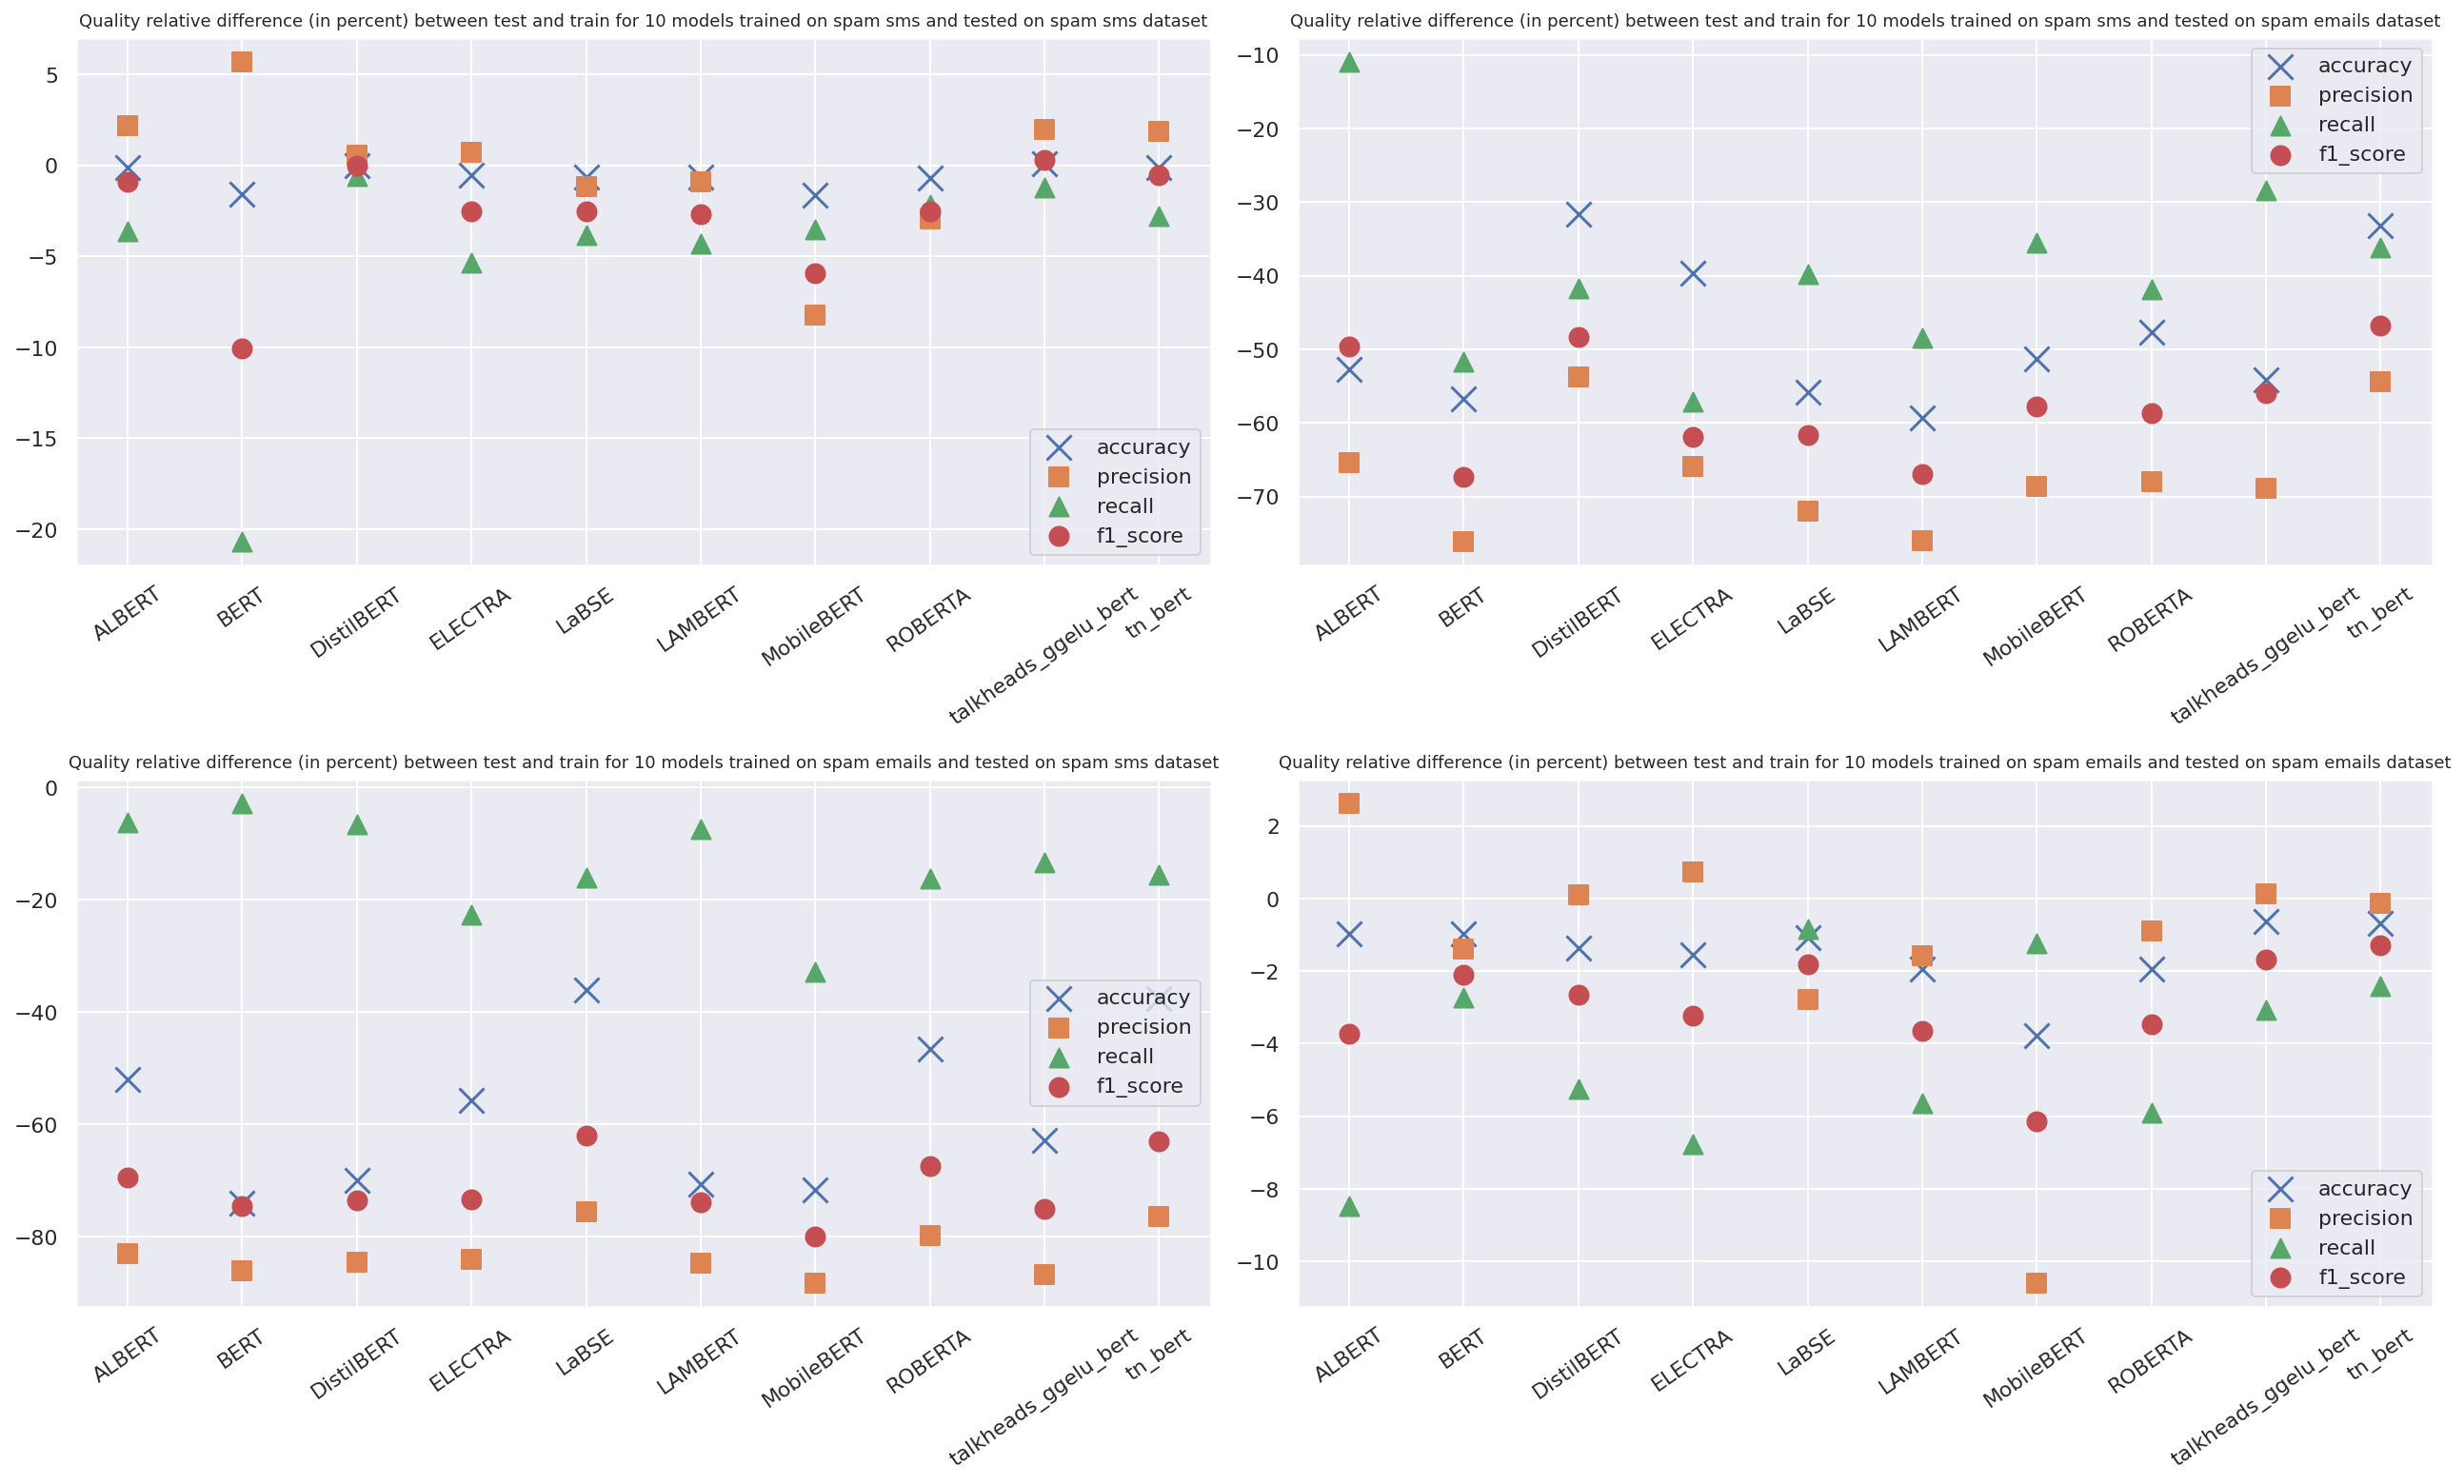

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 11))
for i in range(2):
    for j in range(2):
        df_cur = df_with_quality_difference_in_percent[df_with_quality_difference_in_percent.index.str.contains('trained on spam ' + dataset_names[i] +
                                                                                  ' tested on spam ' + dataset_names[j] + ' dataset') == True]
        axes[i, j].scatter(x=model_names, y=df_cur.accuracy, label='accuracy', marker='x', s=170)
        axes[i, j].scatter(x=model_names, y=df_cur.precision, label='precision', marker='s', s=100)
        axes[i, j].scatter(x=model_names, y=df_cur.recall, label='recall', marker='^', s=100)
        axes[i, j].scatter(x=model_names, y=df_cur.f1_score, label='f1_score', s=100)
        axes[i, j].set_title("Quality relative difference (in percent) between test and train for 10 models "
         + 'trained on spam ' + dataset_names[i] +' and tested on spam ' 
         + dataset_names[j] + ' dataset', fontsize=9)
        axes[i, j].tick_params(axis='x', labelrotation = 35)
        axes[i, j].legend()
fig.tight_layout()
plt.show()

Визуализируем 6: относительные изменения качества (в процентах) на тестовой и обучающей выборках для всех 10 моделей сразу, а также среднее и медианное значения для относительных изменений accuracy, f1_score.

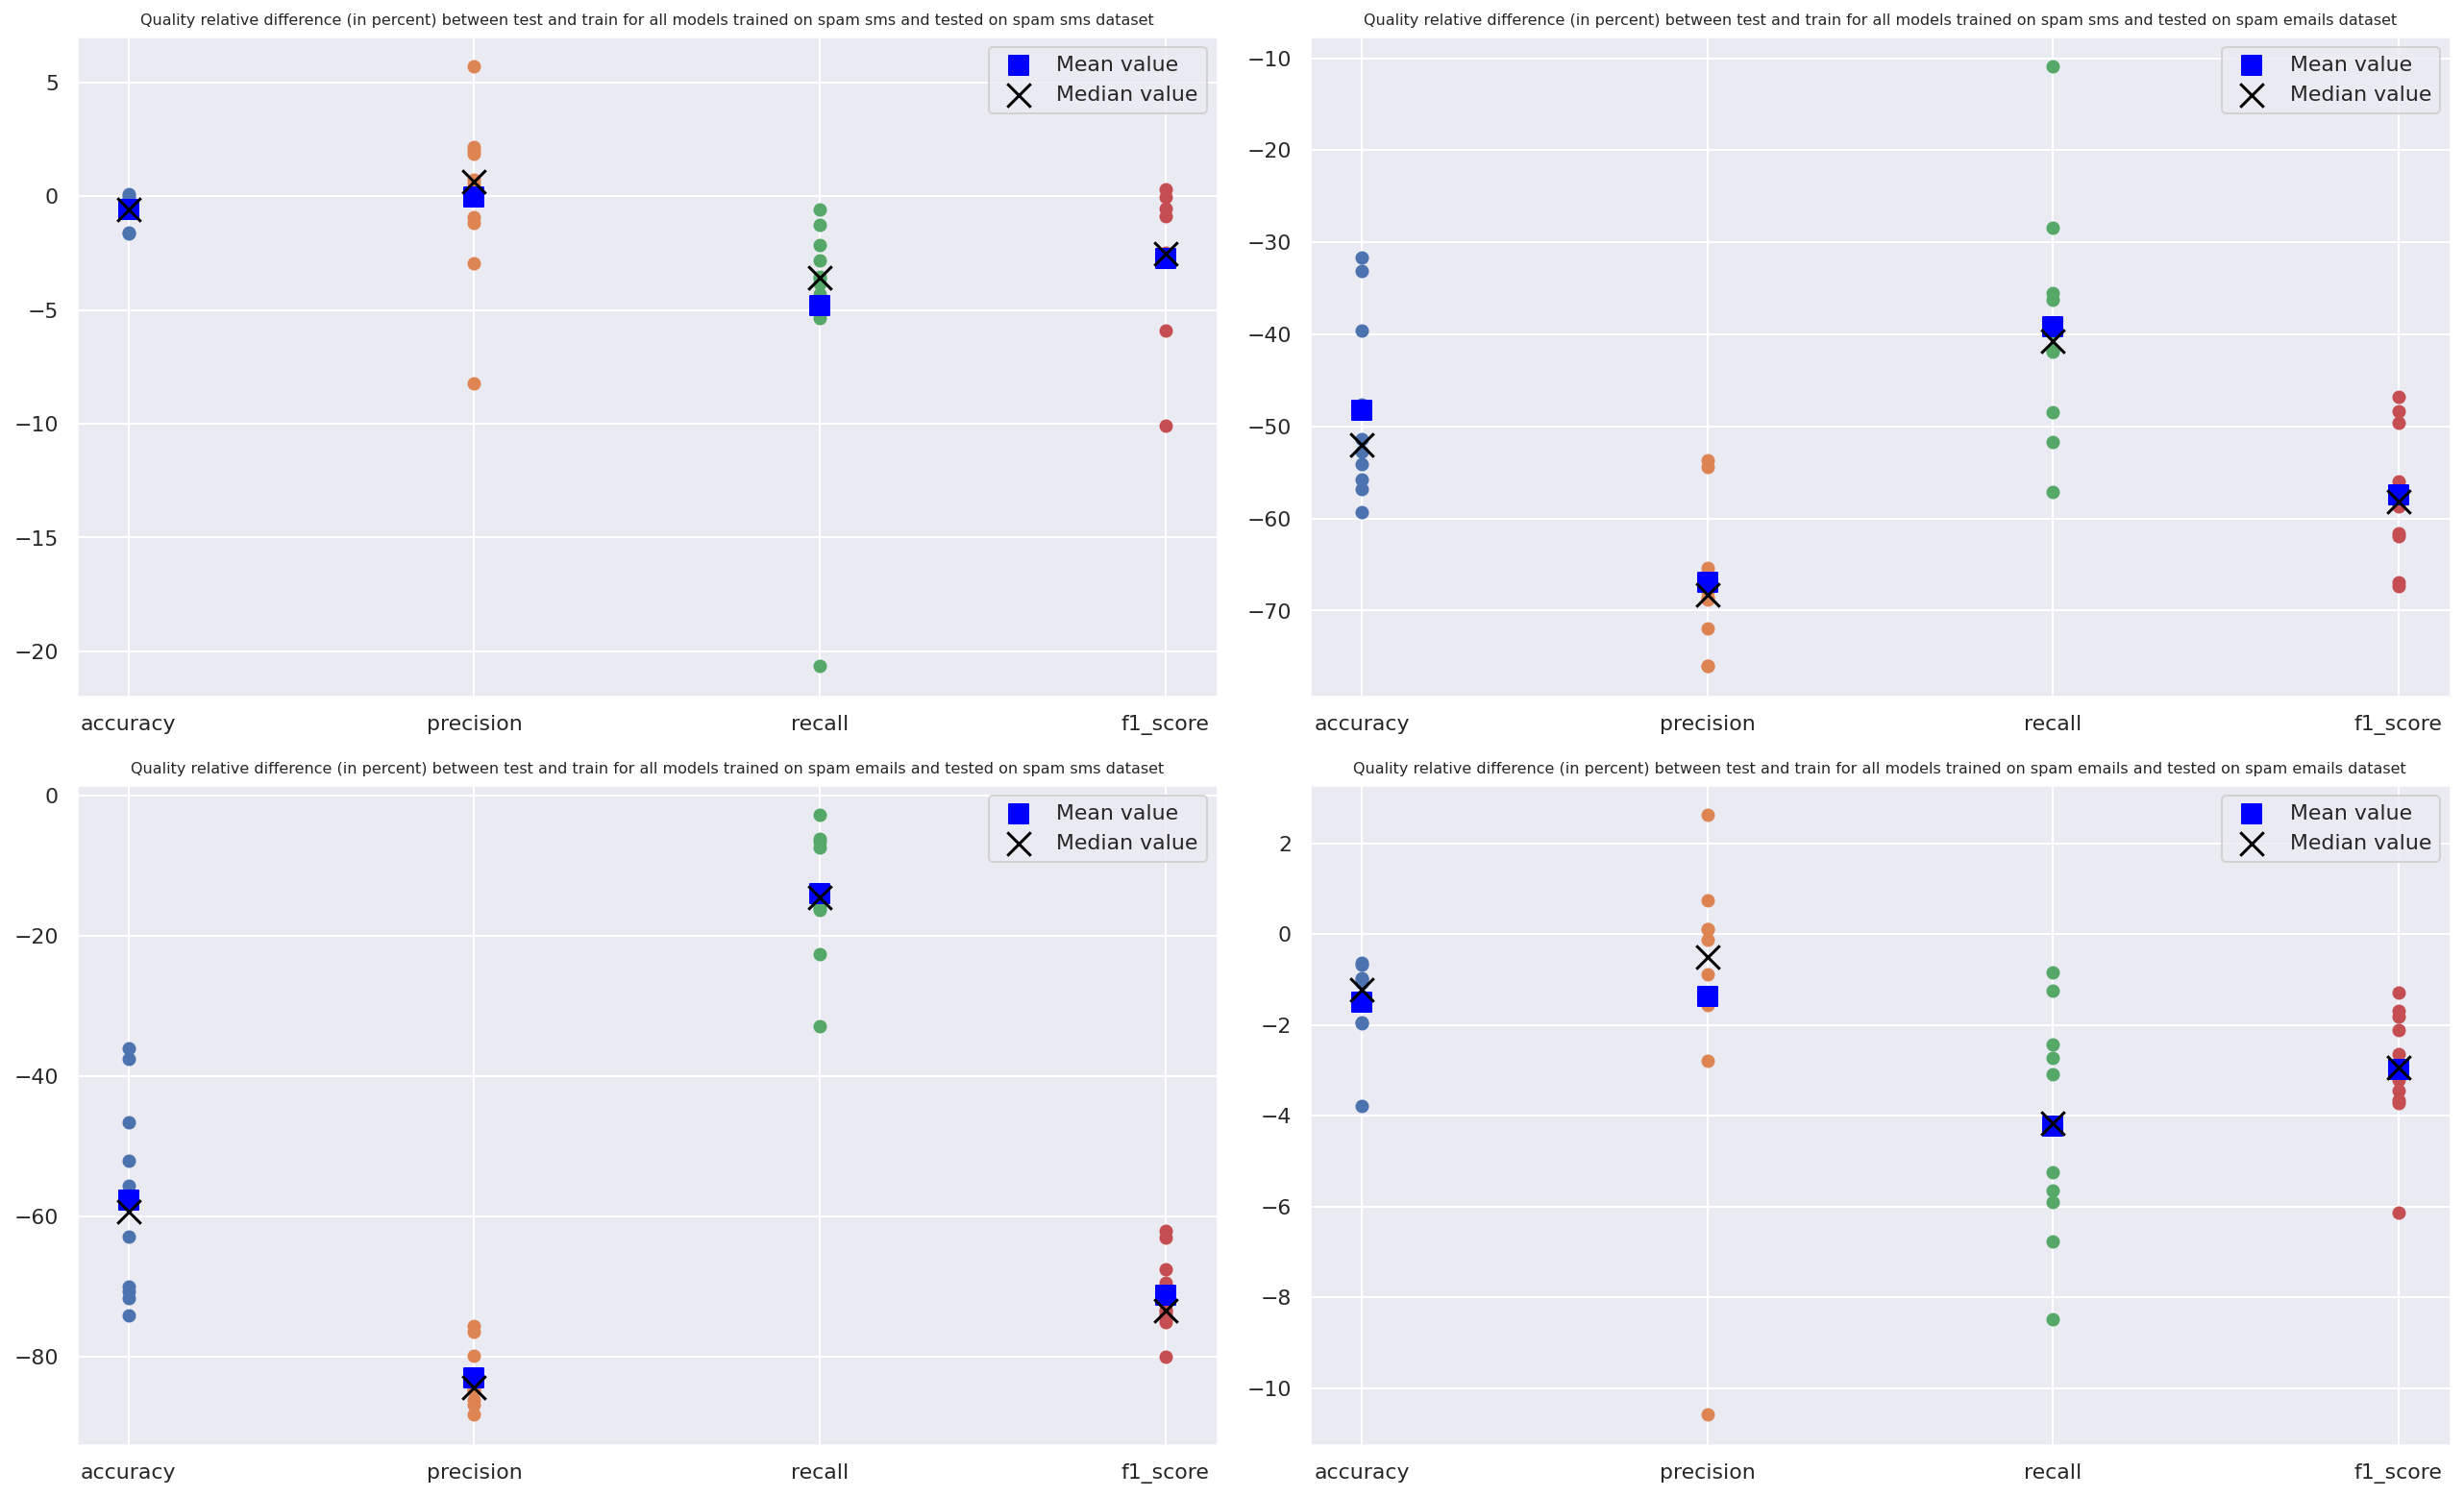

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 11))
for i in range(2):
    for j in range(2):
        df_cur = df_with_quality_difference_in_percent[df_with_quality_difference_in_percent.index.str.contains('trained on spam ' + dataset_names[i] +
                                                                          ' tested on spam ' + dataset_names[j] + ' dataset') == True]
        axes[i, j].scatter(x=['accuracy'] * len(df_cur.accuracy), y=df_cur.accuracy)
        axes[i, j].scatter(x=['precision'] * len(df_cur.precision), y=df_cur.precision)
        axes[i, j].scatter(x=['recall'] * len(df_cur.recall), y=df_cur.recall)
        axes[i, j].scatter(x=['f1_score'] * len(df_cur.f1_score), y=df_cur.f1_score)
        axes[i, j].scatter(x=['accuracy', 
                              'precision', 'recall', 
                            'f1_score'], 
                           y=[df_cur.accuracy.mean(), 
                              df_cur.precision.mean(), df_cur.recall.mean(),
                             df_cur.f1_score.mean()],
                           color='blue', marker='s', s=100, label='Mean value')
        axes[i, j].scatter(x=['accuracy', 
                              'precision', 
                            'recall', 
                            'f1_score'], 
                    y=[df_cur.accuracy.median(), 
                       df_cur.precision.median(), df_cur.recall.median(), 
                    df_cur.f1_score.median()],
                    color='black', marker='x', s=150, label='Median value')
        axes[i, j].set_title("Quality relative difference (in percent) between test and train for all models " 
                             +'trained on spam ' + dataset_names[i] +' and tested on spam '
                              + dataset_names[j] + ' dataset', fontsize=8)
        axes[i, j].legend()
fig.tight_layout()
plt.show()

Вторая серия экспериментов, в отличие от первой, проводилась без балансировки классов в обучающей и тестовой выборках. Сообщений или электронных писем, которые помечены как спам, заметно меньше. Поэтому при анализе второй серии экспериментов следует обращать внимание не на accuracy, а на f1_score.

Во второй серии экспериментов датасеты разбивались на две примерно равные части: обучающую выборку и тестовую выборку.


#**Про сходство датасетов в первом смысле**

По введенному определению сходства датасетов в первом смысле, модель, обученная на датасете A и показывающая хорошие результаты при тестировании на A, также показывает хорошие результаты при тестировании и на B.

То есть проанализировать нужно графики слева-внизу и справа-вверху.

Анализ графиков:

**1) при обучении на датасете с sms и тестировании на датасете с emails (переход с sms на emails):**

**I. качество на тестовой выборке:**

Значения f1_score при тестировании в зависимости от модели колеблются примерно от 0.3 до 0.5; среднее и медианное значения f1_score в районе 0.4.

**II. абсолютное изменение качества:**

f1_score, в зависимости от используемой модели, уменьшается на примерно 0.45–0.65; среднее и медианное значения составляют примерно 0.55 и 0.58 соответственно.

**III. относительное изменение качества:**

Относительное падение f1_score составляет от 46% до 68%, среднее и медианное значения в районе 58%.

**2) при обучении на датасете с emails и тестировании на датасете с sms (переход с emails на sms):**

**I. качество на тестовой выборке:**

значения f1_score при тестировании в зависимости от модели колеблются примерно от 0.2 до 0.38; среднее и медианное значения f1_score в районе 0.26.

**II. абсолютное изменение качества:**

f1_score, в зависимости от используемой модели, уменьшается на примерно 0.46–0.78; среднее и медианное значения составляют примерно 0.64.

**III. относительное изменение качества:**

Относительное падение f1_score составляет от 61% до 80%, среднее и медианное значения в районе 71-73%.

**Заключение по сходству датасетов в первом смысле:**

При переходе с sms на emails значения f1_score получаются выше, чем при переходе с emails на sms. Также при переходе с sms на emails падение f1_score ниже.

Таким образом, перенос качества с датасета с sms на датасет с emails происходит лучше, чем перенос качества наоборот (с датасета с emails на датасет с sms). Следовательно, перенос качества несимметричен.

Вместе с тем, даже при наиболее удачном из двух рассматриваемых переносов среднее и медианное значения f1_score составляют примерно 0.4, что не соответствует
высокому качеству.

Подводя итог, **не наблюдается сходство датасетов в первом смысле (нет переноса качества)**.





# **Про сходство датасетов во втором смысле**:

**1) Для датасета с sms**

**I. качество на тестовой выборке:**

9 из 10 моделей имеют f1_score примерно от 0.89 до 0.98, медианное и среднее значения в районе 0.92-0.94.
Модель Bert имеет f1_score около 0.78, что существенно ниже, чем у остальных моделей.

**II. абсолютное изменение качества:**

Изменение f1_score при переходе с тестовой выборки на обучающую принимает значения от -0.09 до 0.01; среднее и медианное значения в районе -0.025.

**III. относительное изменение качества:**

Относительное изменение f1_score при переходе с тестовой выборки на обучающую составляет от -10% до 1%; медианное и среднее значения в районе -3%. 

**2) Для датасета с emails**

**I. качество на тестовой выборке:**

9 из 10 моделей имеют f1_score примерно от 0.80 до 0.96, медианное и среднее значения примерно 0.91 и 0.88  соответственно.
Модель ALBERT имеет f1_score около 0.74, что существенно ниже, чем у остальных моделей.

**II. абсолютное изменение качества:**

Изменение f1_score при переходе с тестовой выборки на обучающую принимает значения от -0.06 до -0.01; среднее и медианное значения в районе -0.0275.

**III. относительное изменение качества:**

Относительное изменение f1_score при переходе с тестовой выборки на обучающую составляет от -6% до -1%; медианное и среднее значения в районе -3%. 


**Заключение по сходству датасетов во втором смысле:**

Можно утверждать, что в большинстве своем модели хорошо работают и на датасете с sms, и на датасете с emails. Модель BERT показала не такой хороший результат, как остальные модели, на датасете с sms (f1_score = 0.78). А модель ALBERT показала не такой хороший результат на датасете с emails (f1_score около 0.74).

Подводя итог, **наблюдается сходство датасетов во втором смысле**.

#Дополнительное исследование сходства датасетов во втором смысле

В этой части мы исследуем сходство датасетов во втором смысле подробнее.

Мы изучим, является ли разница в качестве стабильной при переходе 

**_от_** обучения и тестирования на датасете А 

**_к_** обучению и тестированию на датасете В.

Рассматриваем абсолютное изменение качества для каждой модели при переходе с датасета spam emails на датасет spam sms:

(_f1_score on spam sms after training on spam sms_) – (_f1_score on spam emails after training on spam emails_).


In [ ]:
df_with_test_results

,accuracy,precision,recall,f1_score
albert trained on spam sms tested on spam sms dataset,0.975583,0.957958,0.855228,0.903683
albert trained on spam sms tested on spam emails dataset,0.462282,0.324384,0.790387,0.459984
albert trained on spam emails tested on spam sms dataset,0.421185,0.142939,0.664879,0.235294
albert trained on spam emails tested on spam emails dataset,0.869246,0.866310,0.648865,0.741985
bert trained on spam sms tested on spam sms dataset,0.950090,0.968000,0.648794,0.776886
bert trained on spam sms tested on spam emails dataset,0.417408,0.219422,0.395194,0.282173
bert trained on spam emails tested on spam sms dataset,0.234829,0.121773,0.758713,0.209863
bert trained on spam emails tested on spam emails dataset,0.895938,0.864742,0.759680,0.808813
distilbert trained on spam sms tested on spam sms dataset,0.989228,0.980392,0.938338,0.958904
distilbert trained on spam sms tested on spam emails dataset,0.675822,0.451260,0.550067,0.495788


In [ ]:
cur_name_for_dataframe = 'df_with_test_results_for_second_series_of_experiments'
df_with_test_results.to_csv('/content/drive/MyDrive/data_for_colab/dataframes/additional_research/' + cur_name_for_dataframe + '.csv')

In [ ]:
df_different_datasets_test_quality_absolute_difference = pd.DataFrame(columns=['f1_score'])
# рассматриваем разницу качеств для каждой модели:
# (f1_score on sms after training on sms) - (f1_score on emails after training on emails)
adding = ' sms vs emails absolute difference on test'
for model_name in model_names_lower_case_list:
    index_name_1 = model_name + ' trained on spam sms tested on spam sms dataset'
    index_name_2 = model_name + ' trained on spam emails tested on spam emails dataset'
    df_different_datasets_test_quality_absolute_difference.loc[model_name + adding, 'f1_score'] = df_with_test_results.loc[index_name_1, 'f1_score'] - df_with_test_results.loc[index_name_2, 'f1_score']


In [ ]:
df_different_datasets_test_quality_absolute_difference  # абсолютное изменение качества для каждой модели при переходе с датасета spam emails на датасет spam sms


,f1_score
albert sms vs emails absolute difference on test,0.161698
bert sms vs emails absolute difference on test,-0.031927
distilbert sms vs emails absolute difference on test,0.041951
electra sms vs emails absolute difference on test,0.017171
labse sms vs emails absolute difference on test,0.013179
lambert sms vs emails absolute difference on test,0.024821
mobilebert sms vs emails absolute difference on test,0.019032
roberta sms vs emails absolute difference on test,0.012216
talkheads_ggelu_bert sms vs emails absolute difference on test,0.086968
tn_bert sms vs emails absolute difference on test,0.022462


In [ ]:
name_for_dataframe = 'df_absolute_quality_difference_when_switching_from_sms_to_emails'
df_different_datasets_test_quality_absolute_difference.to_csv('/content/drive/MyDrive/data_for_colab/dataframes/additional_research/' + name_for_dataframe + '.csv')

Сохраним также аналогичный датафрейм, но уже для перехода в другую сторону: с emails на sms.

In [ ]:
other_direction_df_different_datasets_test_quality_absolute_difference = -df_different_datasets_test_quality_absolute_difference
name_for_dataframe = 'df_absolute_quality_difference_when_switching_from_emails_to_sms'
other_direction_df_different_datasets_test_quality_absolute_difference.to_csv('/content/drive/MyDrive/data_for_colab/dataframes/additional_research/' + name_for_dataframe + '.csv')


Визуализируем 7: абсолютное изменение качества для каждой модели при переходе с датасета spam emails на датасет spam sms (подробно описано выше)

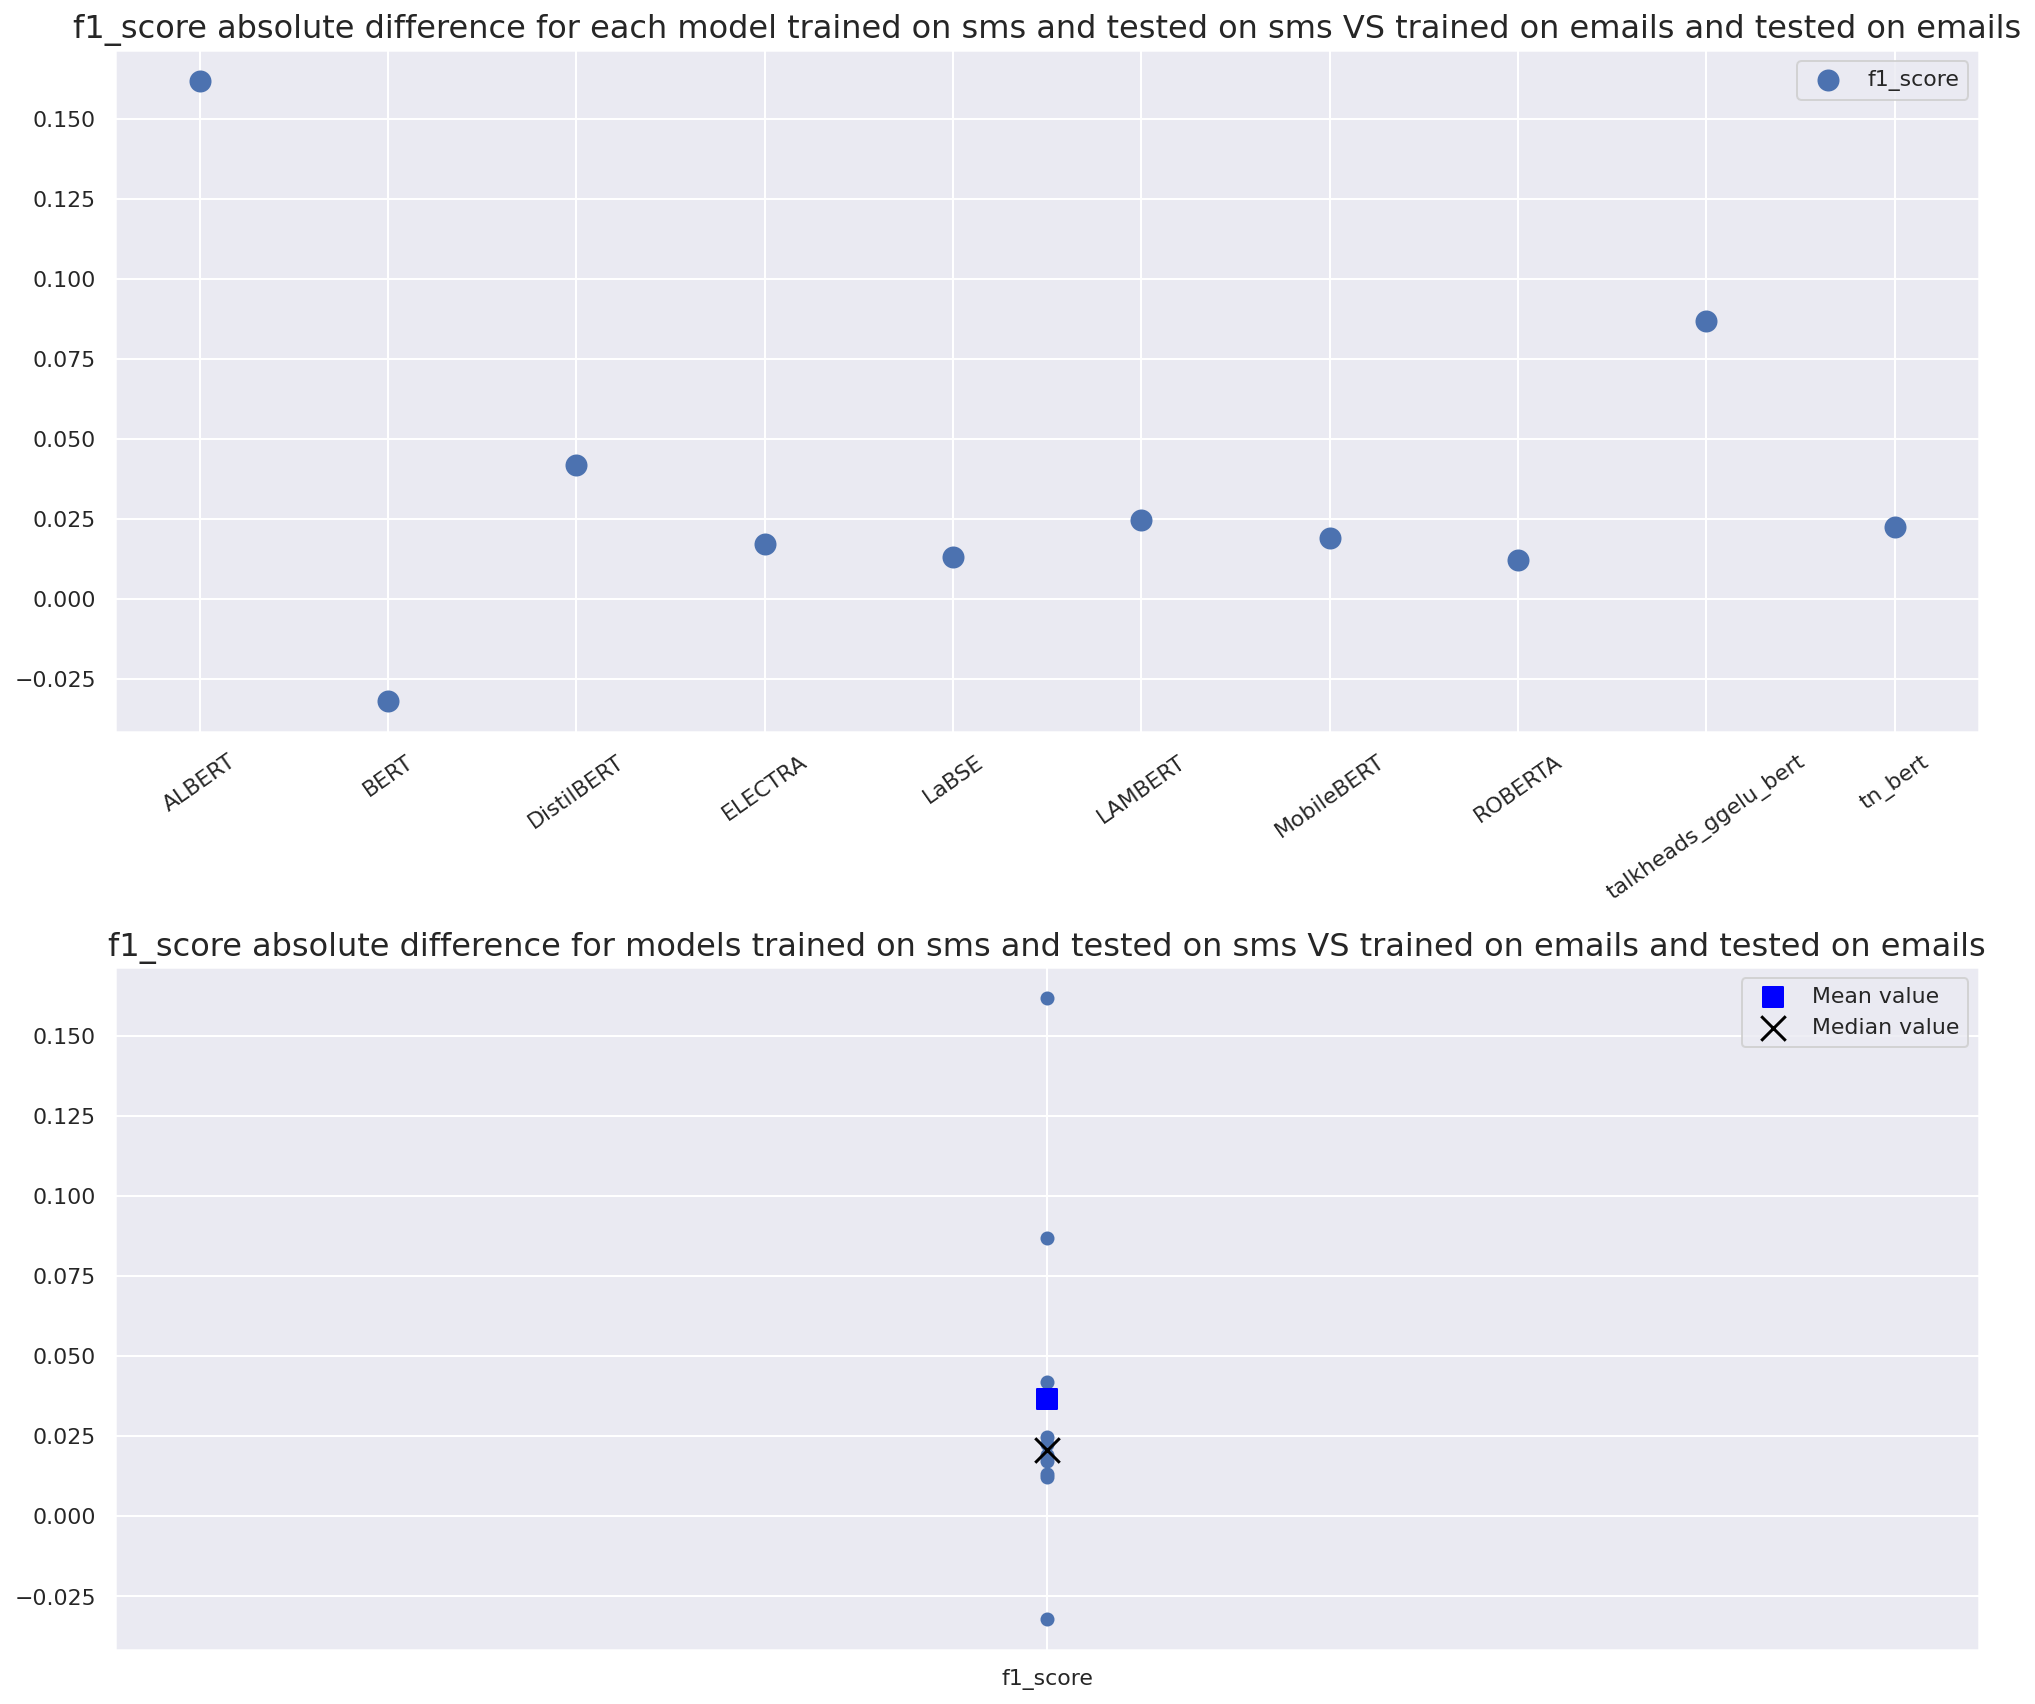

In [ ]:
fig, axes = plt.subplots(2, figsize=(14, 12))

axes[0].scatter(x=model_names, y=df_different_datasets_test_quality_absolute_difference.f1_score, label='f1_score', s=100)
axes[0].tick_params(axis='x', labelrotation = 35)
axes[0].set_title('f1_score absolute difference for each model trained on sms and tested on sms VS trained on emails and tested on emails', fontsize=16)
axes[0].legend()

axes[1].scatter(x=['f1_score'] * len(df_different_datasets_test_quality_absolute_difference.f1_score), y=df_different_datasets_test_quality_absolute_difference.f1_score)
axes[1].scatter(x=['f1_score'], y=[df_different_datasets_test_quality_absolute_difference.f1_score.mean()], color='blue', marker='s', s=100, label='Mean value')
axes[1].scatter(x=['f1_score'], y=[df_different_datasets_test_quality_absolute_difference.f1_score.median()], color='black', marker='x', s=150, label='Median value')
axes[1].set_title('f1_score absolute difference for models trained on sms and tested on sms VS trained on emails and tested on emails', fontsize=16)
axes[1].legend()

fig.tight_layout()
plt.show()

Теперь рассматриваем относительное изменение качества, которое выражено в процентах:

In [ ]:
df_different_datasets_test_quality_relative_difference_in_percent = pd.DataFrame(columns=['f1_score'])
other_direction_df_different_datasets_test_quality_relative_difference_in_percent = pd.DataFrame(columns=['f1_score']) # new
adding = ' sms vs emails relative difference (in percent) on test'
other_direction_adding = ' emails vs sms relative difference on test' # new
for model_name in model_names_lower_case_list:
    index_name_1 = model_name + ' trained on spam sms tested on spam sms dataset'
    index_name_2 = model_name + ' trained on spam emails tested on spam emails dataset'
    df_different_datasets_test_quality_relative_difference_in_percent.loc[model_name + adding, 'f1_score'] = (
        df_with_test_results.loc[index_name_1, 'f1_score'] - df_with_test_results.loc[index_name_2, 'f1_score']
        ) /  df_with_test_results.loc[index_name_2, 'f1_score'] * 100
    # new
    other_direction_df_different_datasets_test_quality_relative_difference_in_percent.loc[model_name + other_direction_adding, 'f1_score'] = (
        df_with_test_results.loc[index_name_2, 'f1_score'] - df_with_test_results.loc[index_name_1, 'f1_score']
        ) / df_with_test_results.loc[index_name_1, 'f1_score'] * 100

In [ ]:
name_for_dataframe = 'df_relative_quality_difference_in_percent_when_switching_from_sms_to_emails'
df_different_datasets_test_quality_relative_difference_in_percent.to_csv('/content/drive/MyDrive/data_for_colab/dataframes/additional_research/' + name_for_dataframe + '.csv')

In [ ]:
# new
name_for_dataframe = 'df_relative_quality_difference_in_percent_when_switching_from_emails_to_sms'
other_direction_df_different_datasets_test_quality_relative_difference_in_percent.to_csv('/content/drive/MyDrive/data_for_colab/dataframes/additional_research/' + name_for_dataframe + '.csv')

Визуализируем 8: относительное изменение качества для каждой модели при переходе с датасета spam emails на датасет spam sms, выраженное в процентах

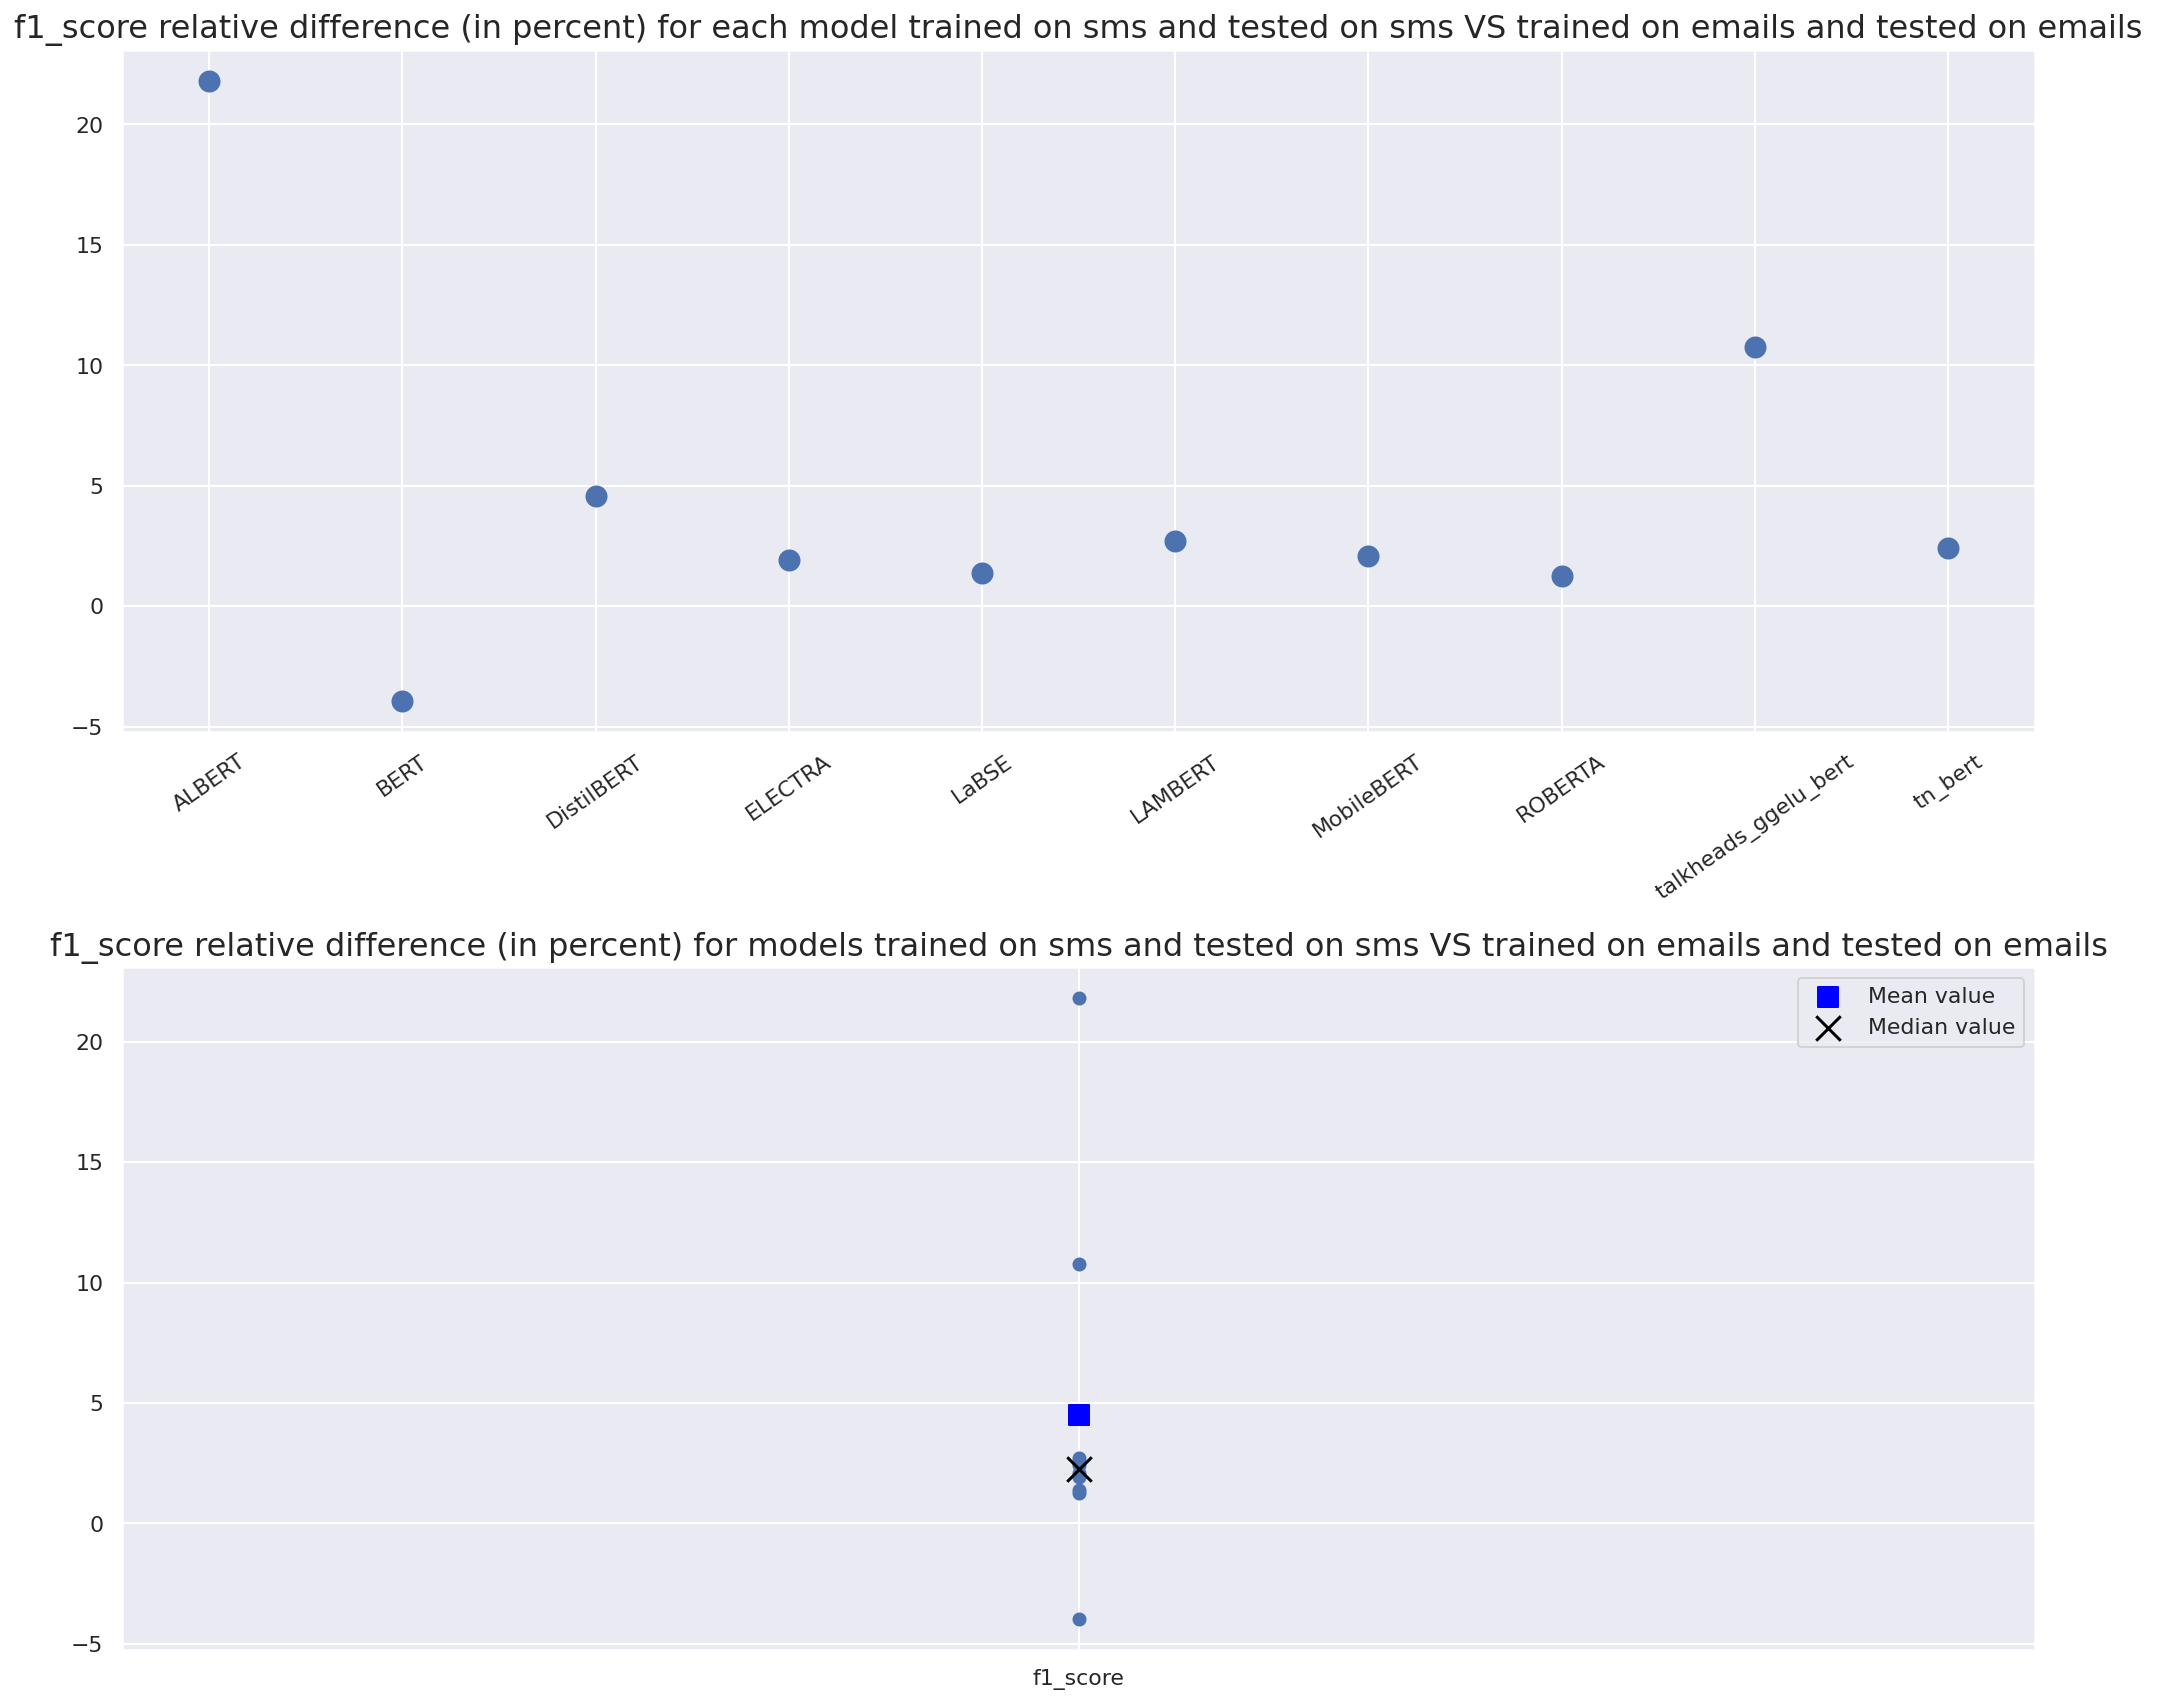

In [ ]:
fig, axes = plt.subplots(2, figsize=(14, 12))

axes[0].scatter(x=model_names, y=df_different_datasets_test_quality_relative_difference_in_percent.f1_score, label='f1_score', s=100)
axes[0].tick_params(axis='x', labelrotation = 35)
axes[0].set_title('f1_score relative difference (in percent) for each model trained on sms and tested on sms VS trained on emails and tested on emails', fontsize=16)

axes[1].scatter(x=['f1_score'] * len(df_different_datasets_test_quality_relative_difference_in_percent.f1_score), y=df_different_datasets_test_quality_relative_difference_in_percent.f1_score)
axes[1].scatter(x=['f1_score'], y=[df_different_datasets_test_quality_relative_difference_in_percent.f1_score.mean()], color='blue', marker='s', s=100, label='Mean value')
axes[1].scatter(x=['f1_score'], y=[df_different_datasets_test_quality_relative_difference_in_percent.f1_score.median()], color='black', marker='x', s=150, label='Median value')
axes[1].set_title('f1_score relative difference (in percent) for models trained on sms and tested on sms VS trained on emails and tested on emails', fontsize=16)

plt.legend()
fig.tight_layout()
plt.show()

**Анализ:**

Переходом с датасета А на датасет В будем называть переход 

**_от_** обучения и тестирования на датасете А 

**_к_** обучению и тестированию на датасете В.

1) Абсолютное изменение f1_score при переходе с датасета spam emails на датасет spam sms составляет от -0.03 до 0.16 (в зависимости от модели). Среднее значение примерно 0.04, медианное значение приблизительно  0.02.

Интересно, что для 7 моделей из 10 абсолютное изменение f1_score почти одинаковое, его можно назвать стабильным: оно находится в промежутке от 0.01 до 0.04.

У двух моделей (ALBERT  и  talkheads_ggelu_bert) абсолютное изменение выше, чем у 7 моделей из предыдущего абзаца, а у одной модели (BERT) – меньше.
 
2) Относительное изменение f1_score при переходе с датасета spam emails на датасет spam sms составляет от -4% до 22%. Среднее значение чуть меньше 5%, тогда как медианное значение приблизительно 2.5%.

Следует отметить, что для тех же самых 7 моделей из 10 относительное изменение f1_score можно назвать стабильным: оно находится в промежутке от 1% до 5%.

------------------

Таким образом, **и абсолютное, и относительное изменение качества (f1_score) при  переходе с датасета spam emails на датасет spam sms небольшое. Для 7 моделей из 10 изменение почти одинаковое, его можно назвать стабильным. Всё это подтверждает сходство датасетов во втором смысле.**


#**_Итоговый вывод по второй серии экспериментов:_**

Наблюдается сходство датасетов только во втором смысле.